In [1]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
data = pd.read_csv('./data/low_temp_19_06.csv')
data.head(5)

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3","gas_feed actual liquid flow, m3/h","gas_feed actual vapour flow, m3/h",gas_feed mass heat capacity,gas_feed vapour fraction,"gas_feed molar flow, kgmole/h",...,17 mass heat capacity,17 vapour fraction,"17 molar flow, kgmole/h",17 Methane mass frac,17 Ethane mass frac,17 Propane mass frac,17 i-Butane mass frac,17 n-Butane mass frac,17 i-Pentane mass frac,17 n-Pentane mass frac
0,-16.0,4232.0,18878.0,23.886155,72.430533,15.214508,245.421431,2.559543,0.758989,0.219537,...,2.251392,0.005083,0.048132,5.404426e-02,0.036171,0.217006,0.180343,0.452925,0.024123,0.035387
1,1.0,4833.0,7853.0,23.778683,74.311097,5.086837,100.590515,2.656815,0.818161,0.091737,...,2.475215,0.000000,0.015413,3.027299e-02,0.077611,0.109804,0.516098,0.234971,0.014643,0.016601
2,-22.0,4414.0,7030.0,24.589672,90.075960,6.902782,71.142459,2.669121,0.680374,0.079415,...,3.285931,0.000258,0.014639,4.030112e-07,0.057266,0.234016,0.302420,0.376537,0.019800,0.009960
3,-3.0,4493.0,27213.0,22.271846,61.124750,14.281073,430.923204,2.575105,0.862006,0.339405,...,3.117985,0.000000,0.040468,7.377296e-03,0.017134,0.182255,0.258367,0.422353,0.058061,0.054453
4,-13.0,4845.0,15393.0,23.169794,79.132676,11.413371,183.108043,2.667372,0.785855,0.184543,...,2.299467,0.004158,0.035108,4.744479e-02,0.049843,0.185275,0.329214,0.311684,0.026514,0.050026


In [3]:
# Расчитываем дополнительные параметры
data['gas_feed molar flow, kgmole/h'] = data['gas_feed molar flow, kgmole/h'] * 3600

data['gas_feed vapour molar flow, kgmole/h'] = data['gas_feed vapour fraction'] * data['gas_feed molar flow, kgmole/h']
data['gas_feed liquid molar flow, kgmole/h'] = data['gas_feed molar flow, kgmole/h'] - data['gas_feed vapour molar flow, kgmole/h']

data['gas_feed Methane mass flow, kg/h'] = data['gas_feed mass flow, kg/h'] * data['gas_feed Methane mass frac']
data['gas_feed Ethane mass flow, kg/h'] = data['gas_feed mass flow, kg/h'] * data['gas_feed Ethane mass frac']
data['gas_feed Propane mass flow, kg/h'] = data['gas_feed mass flow, kg/h'] * data['gas_feed Propane mass frac']
data['gas_feed i-Butane mass flow, kg/h'] = data['gas_feed mass flow, kg/h'] * data['gas_feed i-Butane mass frac']
data['gas_feed n-Butane mass flow, kg/h'] = data['gas_feed mass flow, kg/h'] * data['gas_feed n-Butane mass frac']
data['gas_feed i-Pentane mass flow, kg/h'] = data['gas_feed mass flow, kg/h'] * data['gas_feed i-Pentane mass frac']
data['gas_feed n-Pentane mass flow, kg/h'] = data['gas_feed mass flow, kg/h'] * data['gas_feed n-Pentane mass frac']

data['gas_feed Methane molar flow, kgmole/h'] = data['gas_feed Methane mass flow, kg/h'] / 16.04
data['gas_feed Ethane molar flow, kgmole/h'] = data['gas_feed Ethane mass flow, kg/h'] / 30
data['gas_feed Propane molar flow, kgmole/h'] = data['gas_feed Propane mass flow, kg/h'] / 44
data['gas_feed i-Butane molar flow, kgmole/h'] = data['gas_feed i-Butane mass flow, kg/h'] / 58.12
data['gas_feed n-Butane molar flow, kgmole/h'] = data['gas_feed n-Butane mass flow, kg/h'] / 58.12
data['gas_feed i-Pentane molar flow, kgmole/h'] = data['gas_feed i-Pentane mass flow, kg/h'] / 72.15
data['gas_feed n-Pentane molar flow, kgmole/h'] = data['gas_feed n-Pentane mass flow, kg/h'] / 72.15

data['1 Methane mass flow, kg/h'] = data['1 mass flow, kg/h'] * data['1 Methane mass frac']
data['1 Ethane mass flow, kg/h'] = data['1 mass flow, kg/h'] * data['1 Ethane mass frac']
data['1 Propane mass flow, kg/h'] = data['1 mass flow, kg/h'] * data['1 Propane mass frac']
data['1 i-Butane mass flow, kg/h'] = data['1 mass flow, kg/h'] * data['1 i-Butane mass frac']
data['1 n-Butane mass flow, kg/h'] = data['1 mass flow, kg/h'] * data['1 n-Butane mass frac']
data['1 i-Pentane mass flow, kg/h'] = data['1 mass flow, kg/h'] * data['1 i-Pentane mass frac']
data['1 n-Pentane mass flow, kg/h'] = data['1 mass flow, kg/h'] * data['1 n-Pentane mass frac']

data['1 Methane molar flow, kgmole/h'] = data['1 Methane mass flow, kg/h'] / 16.04
data['1 Ethane molar flow, kgmole/h'] = data['1 Ethane mass flow, kg/h'] / 30
data['1 Propane molar flow, kgmole/h'] = data['1 Propane mass flow, kg/h'] / 44
data['1 i-Butane molar flow, kgmole/h'] = data['1 i-Butane mass flow, kg/h'] / 58.12
data['1 n-Butane molar flow, kgmole/h'] = data['1 n-Butane mass flow, kg/h'] / 58.12
data['1 i-Pentane molar flow, kgmole/h'] = data['1 i-Pentane mass flow, kg/h'] / 72.15
data['1 n-Pentane molar flow, kgmole/h'] = data['1 n-Pentane mass flow, kg/h'] / 72.15


# Определяем плотность сырьевого газа

In [112]:
gas_feed_dens_data = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed Mass density, kg/m3',
]]

In [113]:
gas_feed_dens_data.describe()

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,gas_feed Propane mass frac,gas_feed i-Butane mass frac,gas_feed n-Butane mass frac,gas_feed i-Pentane mass frac,gas_feed n-Pentane mass frac,"gas_feed Mass density, kg/m3"
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,17509.966951,24.522286,719.365460,0.478100,0.123451,0.071425,0.143169,0.163620,0.010120,0.010114,74.084199
std,10.275480,404.079523,7214.000778,2.113006,303.963663,0.080897,0.051093,0.030432,0.064367,0.087054,0.004282,0.004284,18.272784
min,-25.000000,3500.000000,5000.000000,17.914715,164.014283,0.263626,0.010702,0.014382,0.020922,0.002471,0.002245,0.002278,32.152684
25%,-17.000000,3861.000000,11270.000000,23.020770,459.266317,0.419969,0.085843,0.046374,0.089984,0.091384,0.006594,0.006586,60.824100
50%,-9.000000,4214.000000,17512.000000,24.479015,714.255561,0.472891,0.126745,0.070364,0.143793,0.167682,0.009869,0.009859,71.535329
75%,0.000000,4560.000000,23749.750000,25.973181,969.084648,0.530332,0.160758,0.093590,0.192866,0.234552,0.013172,0.013167,84.574906
max,10.000000,4900.000000,30000.000000,31.365853,1617.505790,0.841226,0.318581,0.219201,0.379860,0.433455,0.032060,0.033310,202.689706


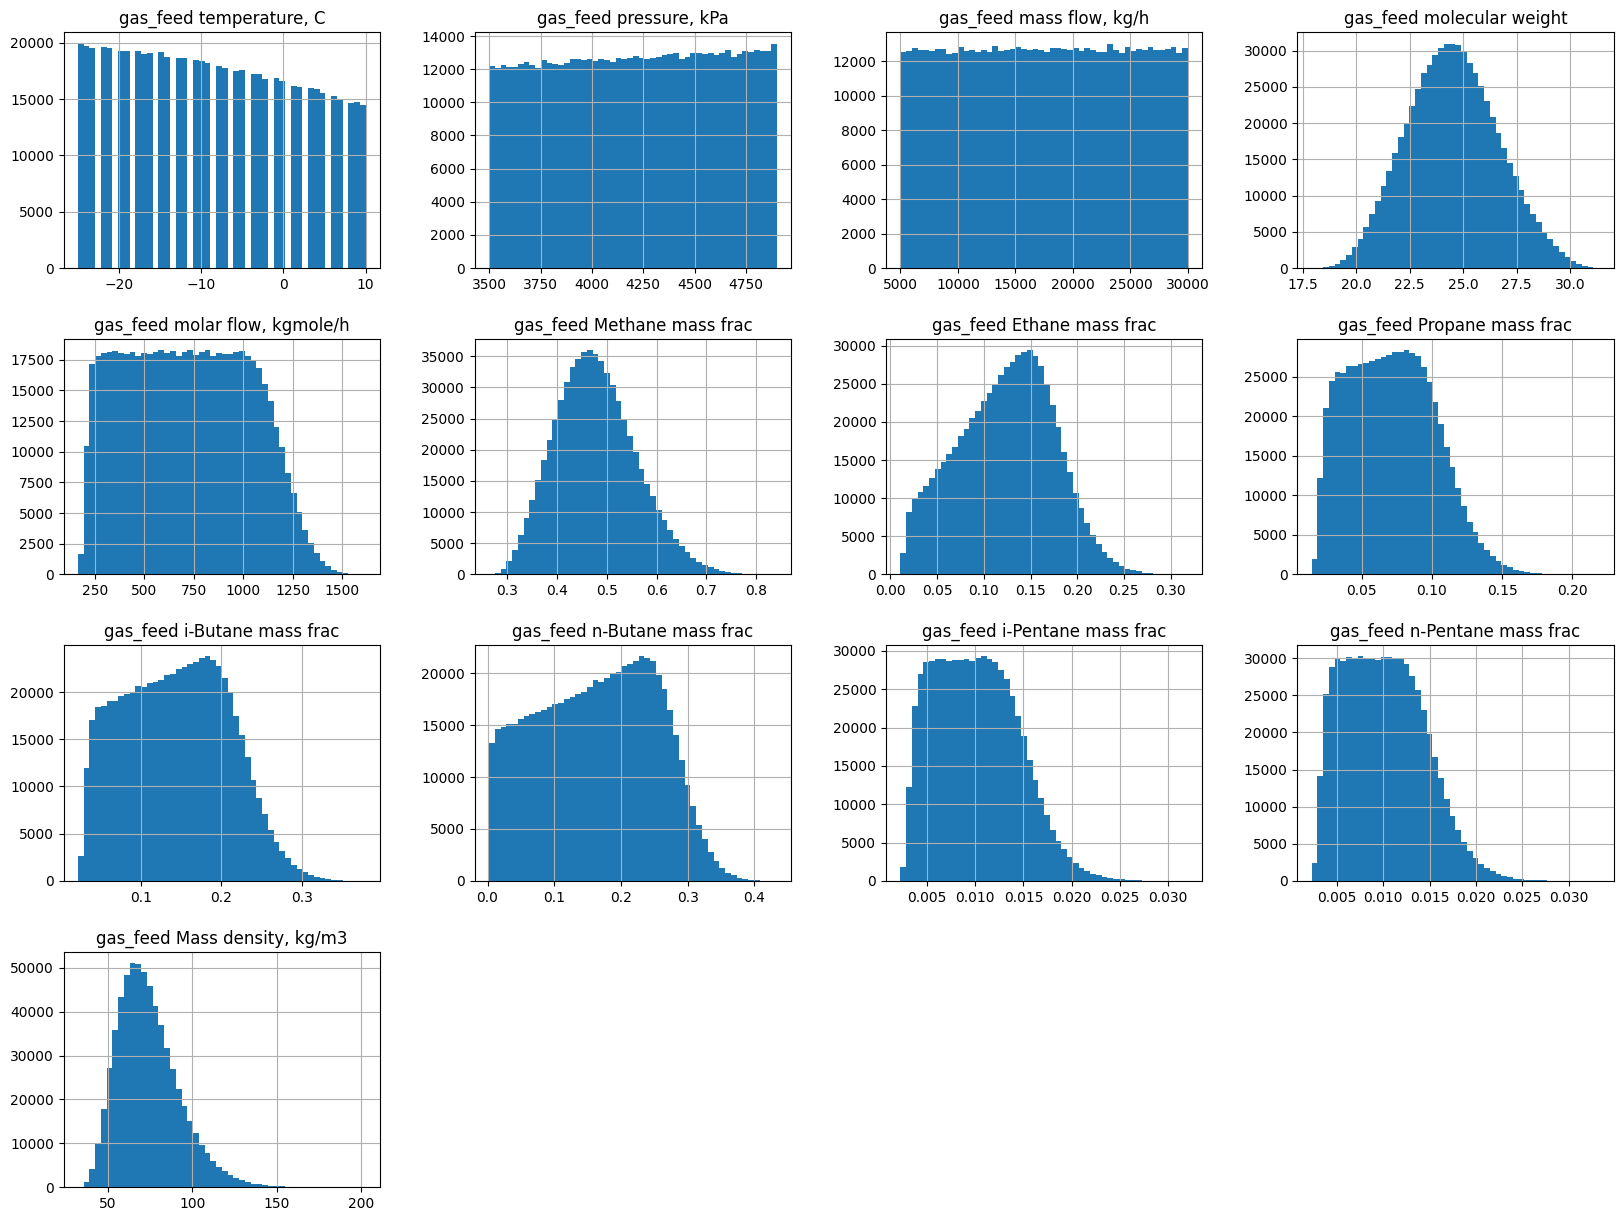

In [114]:
gas_feed_dens_data.hist(bins=50, figsize=(20, 15));

In [115]:
corr_matrix = gas_feed_dens_data.corr()

corr_matrix['gas_feed Mass density, kg/m3'].sort_values(ascending=False)

gas_feed Mass density, kg/m3     1.000000
gas_feed molecular weight        0.739884
gas_feed pressure, kPa           0.507707
gas_feed n-Butane mass frac      0.470699
gas_feed i-Butane mass frac      0.259472
gas_feed Ethane mass frac        0.012255
gas_feed Propane mass frac       0.011486
gas_feed mass flow, kg/h         0.001205
gas_feed n-Pentane mass frac    -0.103936
gas_feed i-Pentane mass frac    -0.104715
gas_feed molar flow, kgmole/h   -0.148174
gas_feed temperature, C         -0.365481
gas_feed Methane mass frac      -0.713992
Name: gas_feed Mass density, kg/m3, dtype: float64

In [116]:
gas_dens_mini_data = gas_feed_dens_data.sample(frac=0.5)

In [117]:
## Тестовая и обучающая выборки
X = gas_dens_mini_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
]]

y = gas_dens_mini_data[[
    'gas_feed Mass density, kg/m3',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((253300, 12), (253300, 1))

In [118]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_0 = gas_feed_dens_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 1.7367 - mae: 1.7367
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2469 - mae: 0.2469
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2081 - mae: 0.2081
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1871 - mae: 0.1871
Epoch 5/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1770 - mae: 0.1770
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1657 - mae: 0.1657
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1484 - mae: 0.1484
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1354 - mae: 0.1354
Epoch 9/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1307 - mae: 0.1307
Epoch 10/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1249 - mae: 0.1249
Epoch 11/20
7916/7916 [======

In [119]:
gas_feed_dens_model_0.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 962us/step - loss: 0.0806 - mae: 0.0806


[0.08064509183168411, 0.08064509183168411]

In [120]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_1 = gas_feed_dens_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 11s 1ms/step - loss: 1.3465 - mae: 1.3465
Epoch 2/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2769 - mae: 0.2769
Epoch 3/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2540 - mae: 0.2540
Epoch 4/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.2468 - mae: 0.2468
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2434 - mae: 0.2434
Epoch 6/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2264 - mae: 0.2264
Epoch 7/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.2225 - mae: 0.2225
Epoch 8/20
7916/7916 [==============================] - 13s 2ms/step - loss: 0.2187 - mae: 0.2187
Epoch 9/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.2137 - mae: 0.2137
Epoch 10/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.2074 - mae: 0.2074
Epoch 11/20
7916/79

In [121]:
gas_feed_dens_model_1.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 944us/step - loss: 0.0702 - mae: 0.0702


[0.07019557803869247, 0.07019557803869247]

In [122]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_2 = gas_feed_dens_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 10s 1ms/step - loss: 1.0436 - mae: 1.0436
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.5855 - mae: 0.5855
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.5125 - mae: 0.5125
Epoch 4/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.4530 - mae: 0.4530
Epoch 5/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.4146 - mae: 0.4146
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3992 - mae: 0.3992
Epoch 7/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.3689 - mae: 0.3689
Epoch 8/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.3631 - mae: 0.3631
Epoch 9/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3261 - mae: 0.3261
Epoch 10/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3272 - mae: 0.3272
Epoch 11/20
7916/7916 [==

In [123]:
gas_feed_dens_model_2.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 896us/step - loss: 0.1224 - mae: 0.1224


[0.1224314272403717, 0.1224314272403717]

In [124]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_3 = gas_feed_dens_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 10s 1ms/step - loss: 10.7852 - mae: 10.7852
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 1.4334 - mae: 1.4334
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.6514 - mae: 0.6514
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.4315 - mae: 0.4315
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.3305 - mae: 0.3305
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2617 - mae: 0.2617
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2176 - mae: 0.2176
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1939 - mae: 0.1939
Epoch 9/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1801 - mae: 0.1801
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1690 - mae: 0.1690
Epoch 11/20
7916/7916 [

In [125]:
gas_feed_dens_model_3.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 909us/step - loss: 0.1187 - mae: 0.1187


[0.11871270090341568, 0.11871270090341568]

In [126]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_4 = gas_feed_dens_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 10s 1ms/step - loss: 2.1909 - mae: 2.1909
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3092 - mae: 0.3092
Epoch 3/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2542 - mae: 0.2542
Epoch 4/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2329 - mae: 0.2329
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2236 - mae: 0.2236
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2169 - mae: 0.2169
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2163 - mae: 0.2163
Epoch 8/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2152 - mae: 0.2152
Epoch 9/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2134 - mae: 0.2134
Epoch 10/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2100 - mae: 0.2100
Epoch 11/20
7916/7916 [=

In [127]:
gas_feed_dens_model_4.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 863us/step - loss: 0.1812 - mae: 0.1812


[0.18116572499275208, 0.18116572499275208]

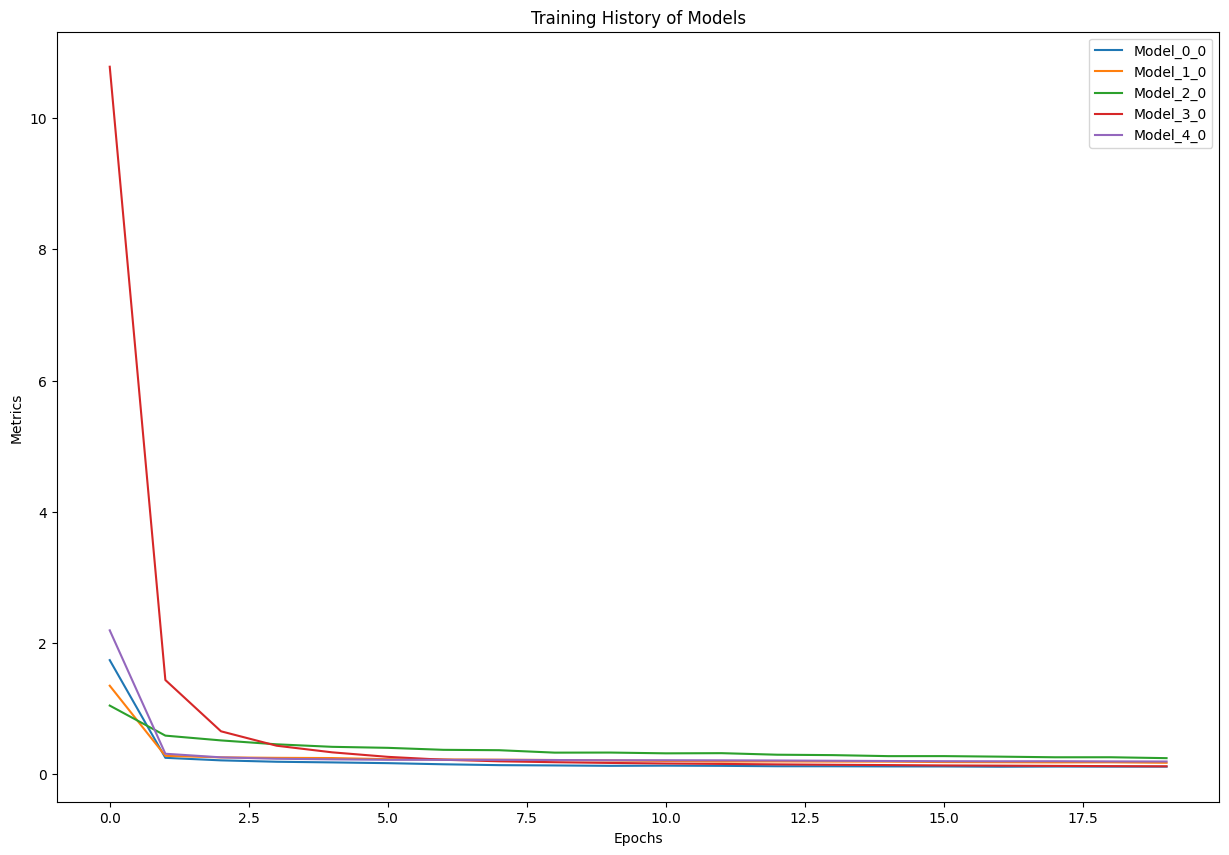

In [128]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(gas_feed_dens_history_0.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(gas_feed_dens_history_1.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(gas_feed_dens_history_2.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(gas_feed_dens_history_3.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(gas_feed_dens_history_4.history['loss']).add_prefix('Model_4_')

# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

## Основная модель для определения плотности сырьевого потока

In [129]:
## Тестовая и обучающая выборки
X = gas_feed_dens_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
]]

y = gas_feed_dens_data[[
    'gas_feed Mass density, kg/m3',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((506600, 12), (506600, 1))

In [130]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history = gas_feed_dens_model.fit(X_train_normal, y_train, epochs=30)

Epoch 1/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.9799 - mae: 0.9799
Epoch 2/30
15832/15832 [==============================] - 21s 1ms/step - loss: 0.2072 - mae: 0.2072
Epoch 3/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.1943 - mae: 0.1943
Epoch 4/30
15832/15832 [==============================] - 21s 1ms/step - loss: 0.1725 - mae: 0.1725
Epoch 5/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.1475 - mae: 0.1475
Epoch 6/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.1363 - mae: 0.1363
Epoch 7/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.1299 - mae: 0.1299
Epoch 8/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.1268 - mae: 0.1268
Epoch 9/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.1217 - mae: 0.1217
Epoch 10/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.1198 - mae: 0.1198

In [131]:
gas_feed_dens_model.evaluate(X_test_normal, y_test)

3958/3958 [==============================] - 4s 874us/step - loss: 0.0652 - mae: 0.0652


[0.06520134955644608, 0.06520134955644608]

In [132]:
y_pred = gas_feed_dens_model.predict(X_test_normal)

3958/3958 [==============================] - 3s 743us/step


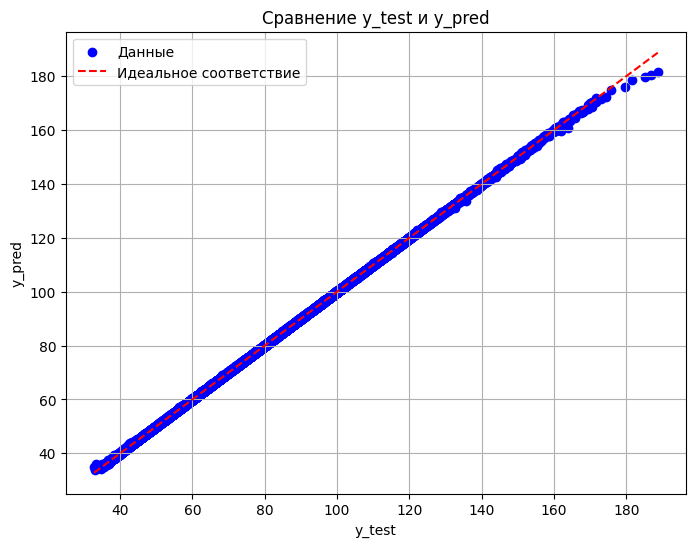

In [133]:
# Диаграмма разброса с линией идеального соответствия

y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, color='blue', label='Данные')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--', label='Идеальное соответствие')
plt.title('Сравнение y_test и y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.grid(True)
plt.show()

In [135]:
X_test

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,gas_feed Propane mass frac,gas_feed i-Butane mass frac,gas_feed n-Butane mass frac,gas_feed i-Pentane mass frac,gas_feed n-Pentane mass frac
340638,-10.0,3540.0,16899.0,26.585286,635.652378,0.394813,0.150543,0.047168,0.106947,0.276140,0.011994,0.012395
314613,-21.0,3790.0,24089.0,23.603790,1020.556431,0.483130,0.198344,0.045978,0.185918,0.063712,0.005943,0.016975
219439,5.0,4817.0,18631.0,26.997583,690.098817,0.375571,0.175129,0.023803,0.032971,0.376260,0.007249,0.009018
374434,-6.0,4064.0,14592.0,26.462820,551.415162,0.436700,0.022114,0.111973,0.142956,0.259062,0.013591,0.013606
313146,-7.0,4728.0,10758.0,24.838100,433.124916,0.442039,0.185710,0.039654,0.283748,0.021875,0.006065,0.020908
...,...,...,...,...,...,...,...,...,...,...,...,...
239029,-9.0,3620.0,10158.0,27.353418,371.361269,0.376289,0.129417,0.070583,0.135993,0.260531,0.014595,0.012593
417657,10.0,4873.0,25420.0,21.950612,1158.054292,0.554916,0.202507,0.022506,0.090826,0.110154,0.007720,0.011371
162767,-9.0,3681.0,20358.0,24.790149,821.213306,0.458476,0.126134,0.081317,0.186522,0.139816,0.003728,0.004006
343861,3.0,4545.0,12090.0,22.807115,530.097739,0.519934,0.195279,0.022154,0.051258,0.188030,0.011978,0.011366


In [148]:
X_test.iloc[3]

gas_feed temperature, C             -6.000000
gas_feed pressure, kPa            4064.000000
gas_feed mass flow, kg/h         14592.000000
gas_feed molecular weight           26.462820
gas_feed molar flow, kgmole/h      551.415162
gas_feed Methane mass frac           0.436700
gas_feed Ethane mass frac            0.022114
gas_feed Propane mass frac           0.111973
gas_feed i-Butane mass frac          0.142956
gas_feed n-Butane mass frac          0.259062
gas_feed i-Pentane mass frac         0.013591
gas_feed n-Pentane mass frac         0.013606
Name: 374434, dtype: float64

In [149]:
y_test

,"gas_feed Mass density, kg/m3"
340638,69.584825
314613,66.185900
219439,94.822776
374434,77.162589
313146,86.363934
...,...
239029,75.632742
417657,60.264275
162767,62.468973
343861,62.678720


In [157]:
test_data = pd.DataFrame({
    'gas_feed temperature, C': [3],
    'gas_feed pressure, kPa': [3500],
    'gas_feed mass flow, kg/h': [25000], 
    'gas_feed molecular weight': [30.53],
    'gas_feed molar flow, kgmole/h': [819.0],
    'gas_feed Methane mass frac': [0.2792],
    'gas_feed Ethane mass frac': [0.1236],
    'gas_feed Propane mass frac': [0.1820],
    'gas_feed i-Butane mass frac': [0.2253],
    'gas_feed n-Butane mass frac': [0.1820],
    'gas_feed i-Pentane mass frac': [0.0056],
    'gas_feed n-Pentane mass frac': [0.0023]
}, index=[0])

# test_arr = np.array(test_data)

# min_val = np.min(test_arr)
# max_val = np.max(test_arr)

# test_norm = (test_arr - min_val) / (max_val - min_val)
# test_norm

In [158]:
test_data_norm = ct.transform(test_data)
test_data_norm

array([[8.00000000e-01, 0.00000000e+00, 8.00000000e-01, 9.37860076e-01,
        4.50153197e-01, 2.43160974e-02, 3.66695278e-01, 8.18371963e-01,
        5.69352586e-01, 4.22396581e-01, 1.12530183e-01, 7.00748505e-04]])

In [159]:
dens = gas_feed_dens_model.predict(test_data_norm)
dens[0][0]

1/1 [==============================] - 0s 19ms/step


88.66691

In [156]:
gas_feed_dens_model.save('./models/low_temp_dist_19_06/gas_feed_dens_model.h5')

# Определяем мольную долю пара в сырьевом потоке

In [164]:
gas_feed_vap_fr_data = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed vapour fraction',
]]

In [165]:
gas_feed_vap_fr_data.describe()

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3","gas_feed molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,gas_feed Propane mass frac,gas_feed i-Butane mass frac,gas_feed n-Butane mass frac,gas_feed i-Pentane mass frac,gas_feed n-Pentane mass frac,gas_feed vapour fraction
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,17509.966951,24.522286,74.084199,719.365460,0.478100,0.123451,0.071425,0.143169,0.163620,0.010120,0.010114,0.763452
std,10.275480,404.079523,7214.000778,2.113006,18.272784,303.963663,0.080897,0.051093,0.030432,0.064367,0.087054,0.004282,0.004284,0.104859
min,-25.000000,3500.000000,5000.000000,17.914715,32.152684,164.014283,0.263626,0.010702,0.014382,0.020922,0.002471,0.002245,0.002278,0.312539
25%,-17.000000,3861.000000,11270.000000,23.020770,60.824100,459.266317,0.419969,0.085843,0.046374,0.089984,0.091384,0.006594,0.006586,0.692753
50%,-9.000000,4214.000000,17512.000000,24.479015,71.535329,714.255561,0.472891,0.126745,0.070364,0.143793,0.167682,0.009869,0.009859,0.766630
75%,0.000000,4560.000000,23749.750000,25.973181,84.574906,969.084648,0.530332,0.160758,0.093590,0.192866,0.234552,0.013172,0.013167,0.838392
max,10.000000,4900.000000,30000.000000,31.365853,202.689706,1617.505790,0.841226,0.318581,0.219201,0.379860,0.433455,0.032060,0.033310,1.000000


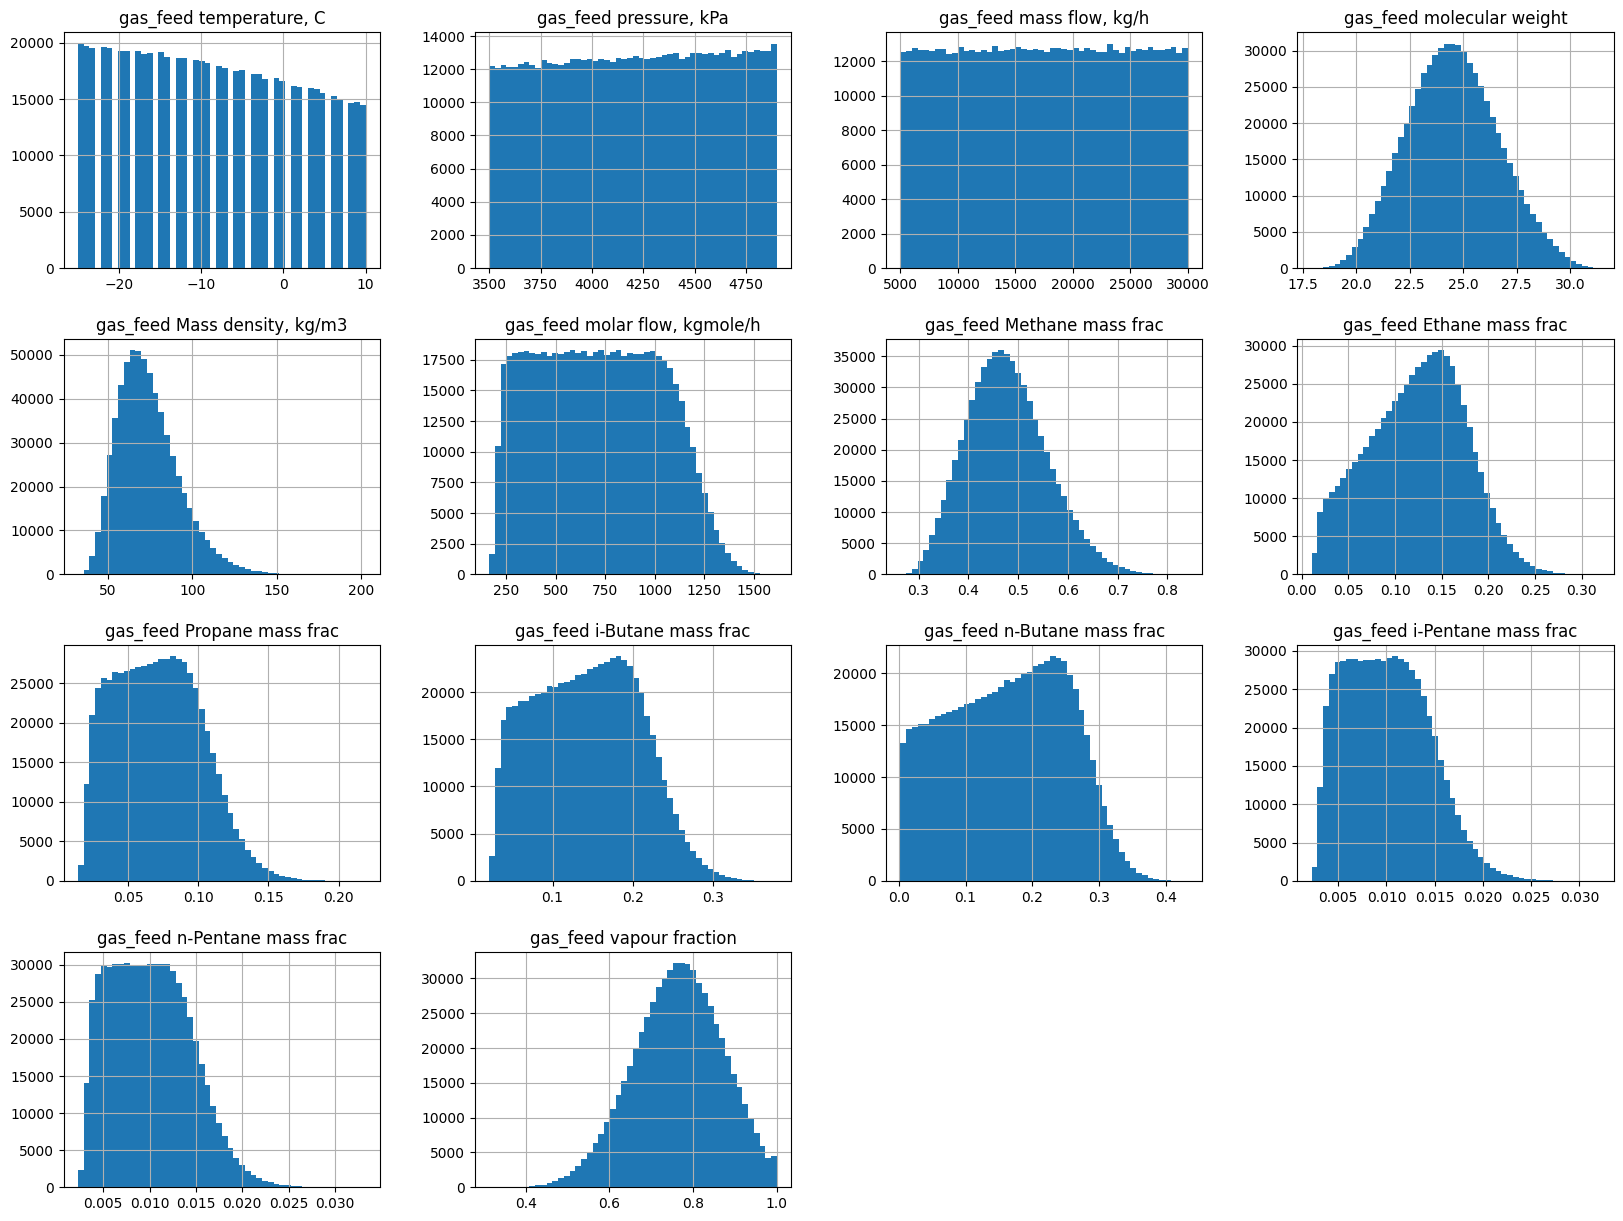

In [166]:
gas_feed_vap_fr_data.hist(bins=50, figsize=(20, 15));

In [167]:
corr_matrix = gas_feed_vap_fr_data.corr()

corr_matrix['gas_feed vapour fraction'].sort_values(ascending=False)

gas_feed vapour fraction         1.000000
gas_feed Methane mass frac       0.859235
gas_feed temperature, C          0.387047
gas_feed molar flow, kgmole/h    0.182043
gas_feed i-Pentane mass frac     0.133693
gas_feed n-Pentane mass frac     0.132885
gas_feed Ethane mass frac        0.054279
gas_feed Propane mass frac       0.001568
gas_feed mass flow, kg/h        -0.001075
gas_feed pressure, kPa          -0.138282
gas_feed i-Butane mass frac     -0.314929
gas_feed n-Butane mass frac     -0.611127
gas_feed molecular weight       -0.895929
gas_feed Mass density, kg/m3    -0.906108
Name: gas_feed vapour fraction, dtype: float64

In [168]:
gas_feed_vap_fr_data_mini = gas_feed_vap_fr_data.sample(frac=0.5)
gas_feed_vap_fr_data_mini.head(10)

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3","gas_feed molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,gas_feed Propane mass frac,gas_feed i-Butane mass frac,gas_feed n-Butane mass frac,gas_feed i-Pentane mass frac,gas_feed n-Pentane mass frac,gas_feed vapour fraction
97772,-25.0,4877.0,19790.0,27.608500,129.541898,716.808231,0.400914,0.023946,0.114729,0.162296,0.271600,0.008183,0.018332,0.545081
335396,-11.0,4656.0,10928.0,27.313615,106.911995,400.093499,0.386961,0.092360,0.091589,0.211416,0.205890,0.005442,0.006342,0.606342
206047,5.0,4340.0,24605.0,20.484380,47.817862,1201.159154,0.660732,0.082182,0.104158,0.088110,0.036788,0.012536,0.015494,0.976173
578105,-19.0,3632.0,25091.0,22.629031,57.097796,1108.796922,0.510100,0.204057,0.131988,0.048881,0.095639,0.005153,0.004181,0.826694
428809,3.0,4090.0,20179.0,22.622712,53.763884,891.979690,0.556794,0.097916,0.063083,0.111488,0.157180,0.006664,0.006876,0.885490
598775,-4.0,4866.0,12043.0,21.933504,66.230330,549.068688,0.602546,0.065744,0.034270,0.117326,0.166088,0.008329,0.005698,0.867378
162082,-25.0,4318.0,27854.0,21.769045,66.787881,1279.523288,0.606449,0.078282,0.044022,0.116969,0.114437,0.022909,0.016932,0.827586
48708,-1.0,4554.0,26340.0,23.501983,67.966877,1120.756482,0.526841,0.066319,0.113243,0.246774,0.012536,0.017991,0.016296,0.830423
273869,-24.0,4480.0,21189.0,24.589754,92.728246,861.700366,0.463364,0.136169,0.079205,0.047552,0.253610,0.008367,0.011732,0.676599
594649,-6.0,3611.0,9210.0,22.319005,48.404993,412.652806,0.532930,0.193313,0.095198,0.066278,0.090207,0.017554,0.004521,0.900906


In [169]:
## Тестовая и обучающая выборки
X = gas_feed_vap_fr_data_mini[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
]]

y = gas_feed_vap_fr_data_mini[[
    'gas_feed vapour fraction',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((253300, 13), (253300, 1))

In [174]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_vap_fr_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_vap_fr_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_vap_fr_history_0 = gas_feed_vap_fr_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0083 - mae: 0.0083
Epoch 2/20
7916/7916 [==============================] - 8s 1ms/step - loss: 0.0021 - mae: 0.0021
Epoch 3/20
7916/7916 [==============================] - 8s 1ms/step - loss: 0.0019 - mae: 0.0019
Epoch 4/20
7916/7916 [==============================] - 8s 1ms/step - loss: 0.0018 - mae: 0.0018
Epoch 5/20
7916/7916 [==============================] - 8s 1ms/step - loss: 0.0016 - mae: 0.0016
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0016 - mae: 0.0016
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0015 - mae: 0.0015
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0014 - mae: 0.0014
Epoch 9/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0014 - mae: 0.0014
Epoch 10/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0013 - mae: 0.0013
Epoch 11/20
7916/7916 [=====

In [175]:
gas_feed_vap_fr_model_0.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 938us/step - loss: 9.6222e-04 - mae: 9.6222e-04


[0.0009622150682844222, 0.0009622150682844222]

In [176]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_vap_fr_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_vap_fr_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_vap_fr_history_1 = gas_feed_vap_fr_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 12s 1ms/step - loss: 0.0081 - mae: 0.0081
Epoch 2/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0024 - mae: 0.0024
Epoch 3/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0021 - mae: 0.0021
Epoch 4/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.0019 - mae: 0.0019
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0018 - mae: 0.0018
Epoch 6/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0016 - mae: 0.0016
Epoch 7/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.0016 - mae: 0.0016
Epoch 8/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0015 - mae: 0.0015
Epoch 9/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0014 - mae: 0.0014
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0014 - mae: 0.0014
Epoch 11/20
7916/79

In [177]:
gas_feed_vap_fr_model_1.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 1ms/step - loss: 6.9641e-04 - mae: 6.9641e-04


[0.0006964107742533088, 0.0006964107742533088]

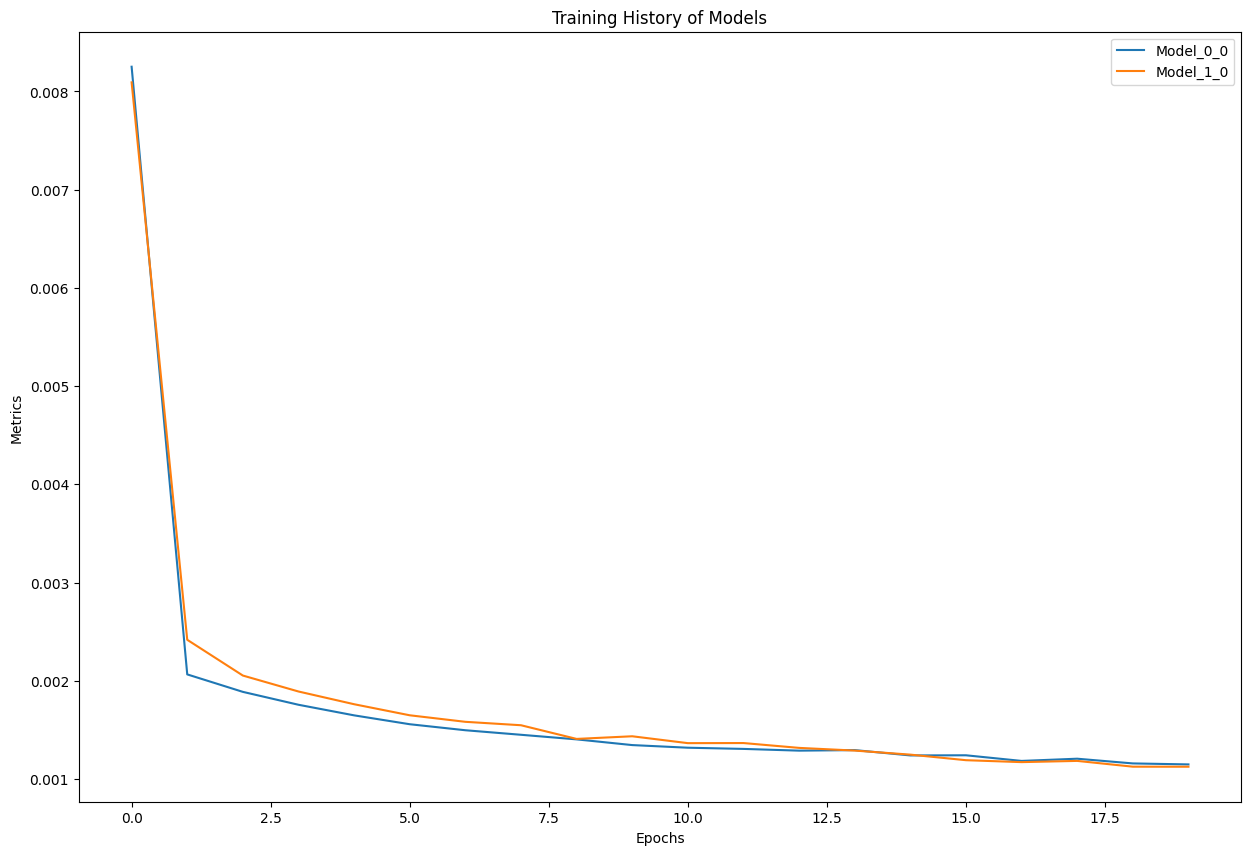

In [178]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(gas_feed_vap_fr_history_0.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(gas_feed_vap_fr_history_1.history['loss']).add_prefix('Model_1_')


# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

## Основная модель для определения доли пара

In [214]:
## Тестовая и обучающая выборки
X = gas_feed_vap_fr_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
]]

y = gas_feed_vap_fr_data[[
    'gas_feed vapour fraction',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((506600, 13), (506600, 1))

In [180]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_vap_fr_model = tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_vap_fr_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_vap_fr_history = gas_feed_vap_fr_model.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
15832/15832 [==============================] - 17s 1ms/step - loss: 0.0048 - mae: 0.0048
Epoch 2/20
15832/15832 [==============================] - 17s 1ms/step - loss: 0.0019 - mae: 0.0019
Epoch 3/20
15832/15832 [==============================] - 17s 1ms/step - loss: 0.0016 - mae: 0.0016
Epoch 4/20
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0015 - mae: 0.0015
Epoch 5/20
15832/15832 [==============================] - 17s 1ms/step - loss: 0.0014 - mae: 0.0014
Epoch 6/20
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0013 - mae: 0.0013
Epoch 7/20
15832/15832 [==============================] - 17s 1ms/step - loss: 0.0012 - mae: 0.0012
Epoch 8/20
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0012 - mae: 0.0012
Epoch 9/20
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0012 - mae: 0.0012
Epoch 10/20
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0011 - mae: 0.0011

In [181]:
gas_feed_vap_fr_model.evaluate(X_test_normal, y_test)

3958/3958 [==============================] - 4s 907us/step - loss: 6.1636e-04 - mae: 6.1636e-04


[0.0006163616781122983, 0.0006163616781122983]

In [183]:
y_pred = gas_feed_vap_fr_model.predict(X_test_normal)

3958/3958 [==============================] - 3s 751us/step


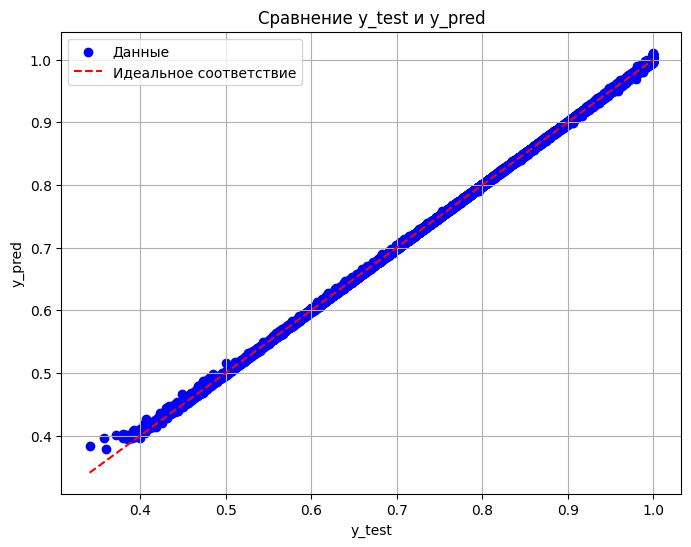

In [184]:
# Диаграмма разброса с линией идеального соответствия

y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, color='blue', label='Данные')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--', label='Идеальное соответствие')
plt.title('Сравнение y_test и y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.grid(True)
plt.show()

In [218]:
test_data = pd.DataFrame({
    'gas_feed temperature, C': [-10],
    'gas_feed pressure, kPa': [4000],
    'gas_feed mass flow, kg/h': [25000], 
    'gas_feed molecular weight': [30.53],
    'gas_feed Mass density, kg/m3': [123.6],
    'gas_feed molar flow, kgmole/h': [819.0],
    'gas_feed Methane mass frac': [0.2792],
    'gas_feed Ethane mass frac': [0.1236],
    'gas_feed Propane mass frac': [0.1820],
    'gas_feed i-Butane mass frac': [0.2253],
    'gas_feed n-Butane mass frac': [0.1820],
    'gas_feed i-Pentane mass frac': [0.0056],
    'gas_feed n-Pentane mass frac': [0.0023]
}, index=[0])

In [219]:
test_data_norm = ct.transform(test_data)
test_data_norm

array([[4.28571429e-01, 3.57142857e-01, 8.00000000e-01, 9.37860076e-01,
        5.36231459e-01, 4.50153197e-01, 2.43160974e-02, 3.66695278e-01,
        8.18371963e-01, 5.69352586e-01, 4.22396581e-01, 1.12530183e-01,
        7.00748505e-04]])

In [220]:
vap_fr = gas_feed_vap_fr_model.predict(test_data_norm)
vap_fr[0][0]

1/1 [==============================] - 0s 22ms/step


0.46335655

In [221]:
gas_feed_vap_fr_model.save('./models/low_temp_dist_19_06/gas_feed_vap_fr_model.h5')

# Определение массового расхода пара из сепаратора

In [28]:
sep_vap_mass_flow_data = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',  'gas_feed vapour molar flow, kgmole/h',
    'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass frac', 'gas_feed Ethane mass frac',
    'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed Methane mass flow, kg/h', 'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h',
    'gas_feed i-Butane mass flow, kg/h', 'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h',
    'gas_feed n-Pentane mass flow, kg/h', 'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', 
    'gas_feed vapour fraction', '1 mass flow, kg/h'
]]

In [29]:
sep_vap_mass_flow_data.describe()

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3","gas_feed molar flow, kgmole/h","gas_feed vapour molar flow, kgmole/h","gas_feed liquid molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,...,"gas_feed n-Pentane mass flow, kg/h","gas_feed Methane molar flow, kgmole/h","gas_feed Ethane molar flow, kgmole/h","gas_feed Propane molar flow, kgmole/h","gas_feed i-Butane molar flow, kgmole/h","gas_feed n-Butane molar flow, kgmole/h","gas_feed i-Pentane molar flow, kgmole/h","gas_feed n-Pentane molar flow, kgmole/h",gas_feed vapour fraction,"1 mass flow, kg/h"
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,...,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,17509.966951,24.522286,74.084199,719.365460,555.003651,164.361809,0.478100,0.123451,...,177.089787,521.856793,72.068694,28.425303,43.131686,49.303638,2.455704,2.454467,0.763452,10712.431423
std,10.275480,404.079523,7214.000778,2.113006,18.272784,303.963663,263.121333,95.856721,0.080897,0.051093,...,109.035376,235.191165,43.877957,17.573898,27.483898,34.884778,1.511052,1.511232,0.104859,5162.592892
min,-25.000000,3500.000000,5000.000000,17.914715,32.152684,164.014283,56.688257,0.000000,0.263626,0.010702,...,12.704687,89.412526,2.079377,1.909704,2.064457,0.251074,0.173227,0.176087,0.312539,1034.439396
25%,-17.000000,3861.000000,11270.000000,23.020770,60.824100,459.266317,339.657061,88.251201,0.419969,0.085843,...,92.200717,326.174079,36.782681,14.593052,21.174918,21.462512,1.278634,1.277903,0.692753,6513.165916
50%,-9.000000,4214.000000,17512.000000,24.479015,71.535329,714.255561,528.789015,148.461811,0.472891,0.126745,...,151.972914,507.099865,63.870318,24.436784,36.925108,41.799937,2.108255,2.106347,0.766630,10149.633666
75%,0.000000,4560.000000,23749.750000,25.973181,84.574906,969.084648,737.211186,226.409495,0.530332,0.160758,...,241.271267,694.158344,100.572114,39.032780,60.302306,71.589470,3.347614,3.344023,0.838392,14213.364740
max,10.000000,4900.000000,30000.000000,31.365853,202.689706,1617.505790,1617.505790,625.241457,0.841226,0.318581,...,931.419441,1500.604067,305.446234,134.065145,180.561015,204.949783,12.523596,12.909486,1.000000,29995.000000


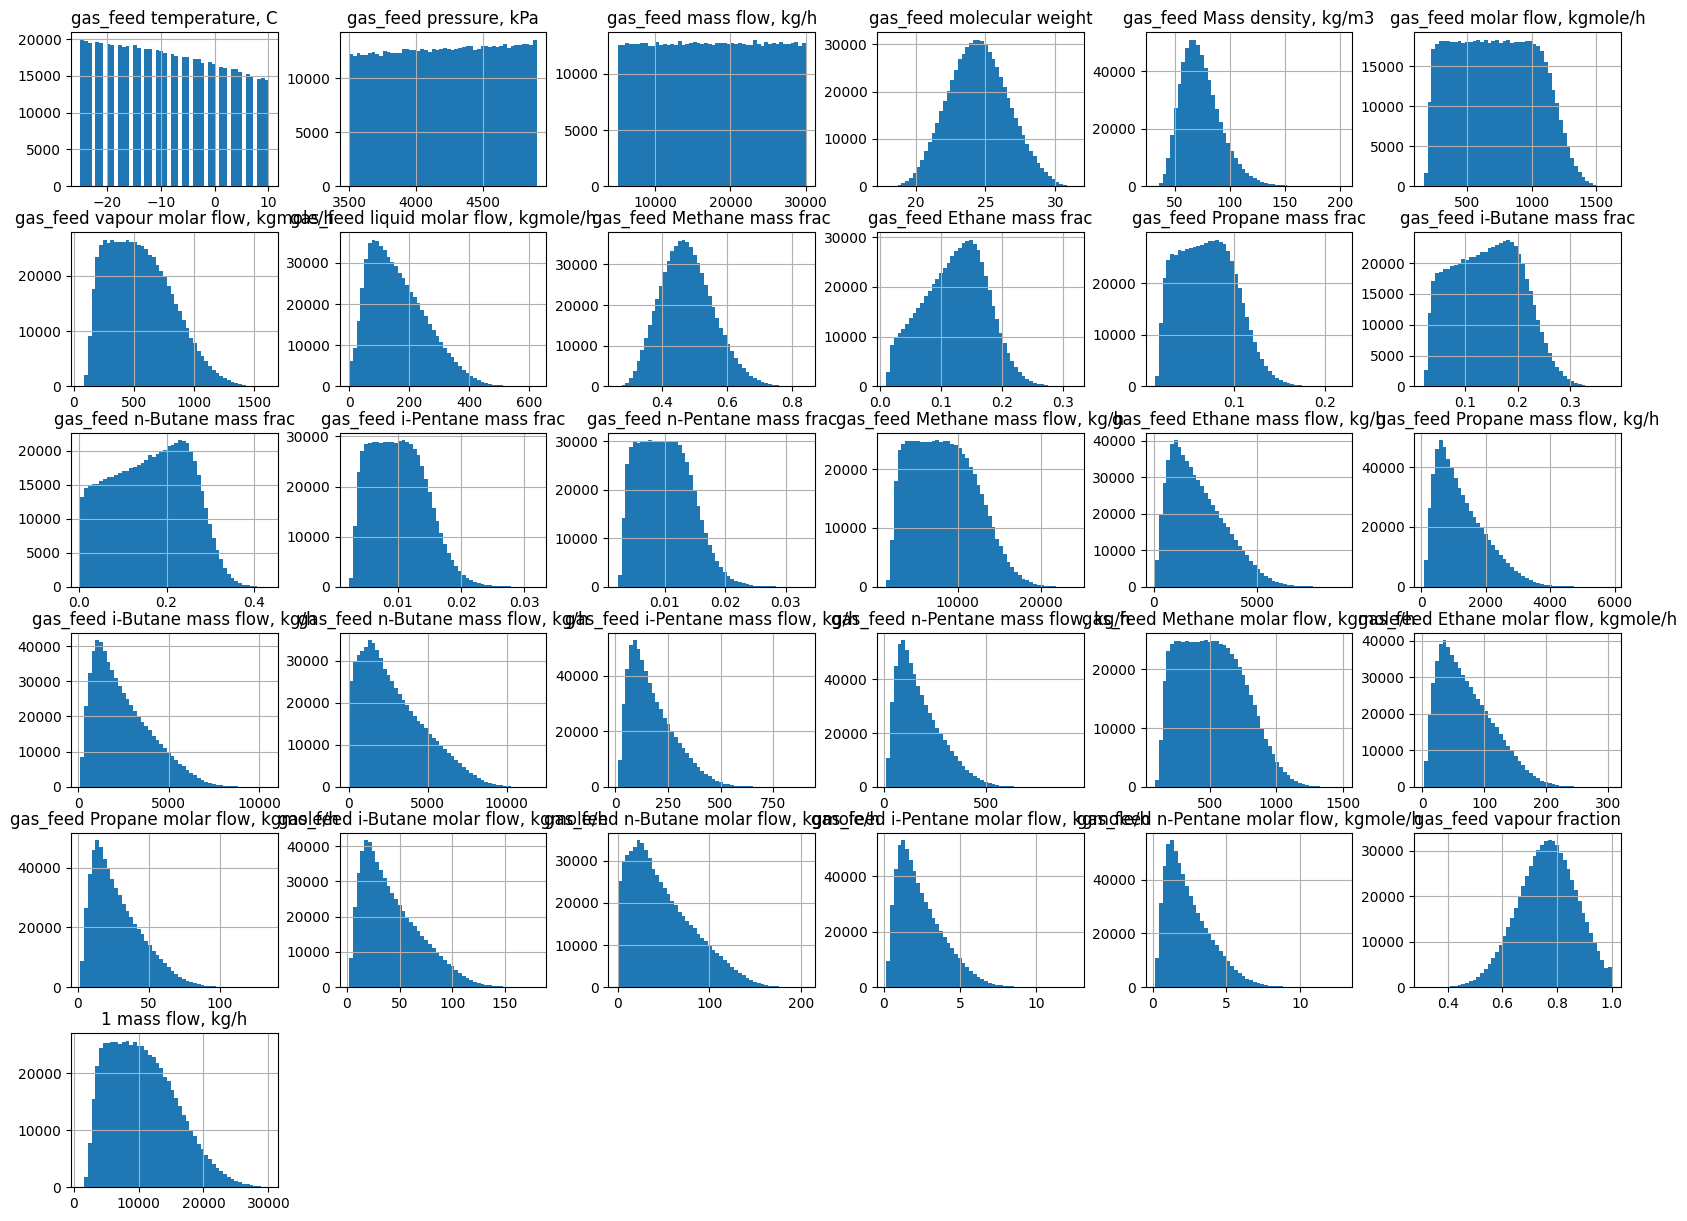

In [30]:
sep_vap_mass_flow_data.hist(bins=50, figsize=(20, 15));

In [44]:
corr_matrix = sep_vap_mass_flow_data.corr()

corr_matrix['1 mass flow, kg/h'].sort_values(ascending=False)

1 mass flow, kg/h                          1.000000
gas_feed vapour molar flow, kgmole/h       0.994241
gas_feed Methane mass flow, kg/h           0.958824
gas_feed Methane molar flow, kgmole/h      0.958824
gas_feed molar flow, kgmole/h              0.936814
gas_feed mass flow, kg/h                   0.854814
gas_feed Ethane molar flow, kgmole/h       0.634690
gas_feed Ethane mass flow, kg/h            0.634690
gas_feed n-Pentane mass flow, kg/h         0.623470
gas_feed n-Pentane molar flow, kgmole/h    0.623470
gas_feed i-Pentane mass flow, kg/h         0.623361
gas_feed i-Pentane molar flow, kgmole/h    0.623361
gas_feed Propane mass flow, kg/h           0.584282
gas_feed Propane molar flow, kgmole/h      0.584282
gas_feed vapour fraction                   0.472509
gas_feed i-Butane molar flow, kgmole/h     0.422764
gas_feed i-Butane mass flow, kg/h          0.422764
gas_feed Methane mass frac                 0.402991
gas_feed liquid molar flow, kgmole/h       0.241520
gas_feed n-B

In [45]:
sep_vap_mass_flow_data_mini = sep_vap_mass_flow_data.sample(frac=0.5)

In [46]:
## Тестовая и обучающая выборки
X = sep_vap_mass_flow_data_mini[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',  'gas_feed vapour molar flow, kgmole/h',
    'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass frac', 'gas_feed Ethane mass frac',
    'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed Methane mass flow, kg/h', 'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h',
    'gas_feed i-Butane mass flow, kg/h', 'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h',
    'gas_feed n-Pentane mass flow, kg/h', 'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', 
    'gas_feed vapour fraction',
]]

y = sep_vap_mass_flow_data_mini[[
     '1 mass flow, kg/h'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',  'gas_feed vapour molar flow, kgmole/h',
    'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass frac', 'gas_feed Ethane mass frac',
    'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed Methane mass flow, kg/h', 'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h',
    'gas_feed i-Butane mass flow, kg/h', 'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h',
    'gas_feed n-Pentane mass flow, kg/h', 'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', 
    'gas_feed vapour fraction',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((253300, 30), (253300, 1))

In [47]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_mass_flow_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
sep_vap_mass_flow_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_mass_flow_history_0 = sep_vap_mass_flow_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 781.7456 - mae: 781.7456
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 65.9686 - mae: 65.9686
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 52.8347 - mae: 52.8347
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 42.5649 - mae: 42.5649
Epoch 5/20
7916/7916 [==============================] - 8s 1ms/step - loss: 35.3869 - mae: 35.3869
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 30.6641 - mae: 30.6641
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 28.0053 - mae: 28.0053
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 26.6528 - mae: 26.6528
Epoch 9/20
7916/7916 [==============================] - 8s 1ms/step - loss: 25.9932 - mae: 25.9932
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 24.9816 - mae: 24.9816
Epoch 

In [48]:
sep_vap_mass_flow_model_0.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 1s 662us/step - loss: 24.6781 - mae: 24.6781


[24.678071975708008, 24.678071975708008]

In [52]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_mass_flow_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
sep_vap_mass_flow_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_mass_flow_history_1 = sep_vap_mass_flow_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 590.9440 - mae: 590.9440
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 41.6348 - mae: 41.6348
Epoch 3/20
7916/7916 [==============================] - 10s 1ms/step - loss: 28.3907 - mae: 28.3907
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 25.1536 - mae: 25.1536
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 23.1665 - mae: 23.1665
Epoch 6/20
7916/7916 [==============================] - 10s 1ms/step - loss: 21.3202 - mae: 21.3202
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 19.8394 - mae: 19.8394
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 18.7854 - mae: 18.7854
Epoch 9/20
7916/7916 [==============================] - 11s 1ms/step - loss: 17.7861 - mae: 17.7861
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 17.1260 - mae: 17.1260
Ep

In [53]:
sep_vap_mass_flow_model_1.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 760us/step - loss: 12.7924 - mae: 12.7924


[12.79236888885498, 12.79236888885498]

In [54]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_mass_flow_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
sep_vap_mass_flow_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_mass_flow_history_2 = sep_vap_mass_flow_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 10s 1ms/step - loss: 337.1648 - mae: 337.1648
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 36.1064 - mae: 36.1064
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 32.0637 - mae: 32.0637
Epoch 4/20
7916/7916 [==============================] - 10s 1ms/step - loss: 29.6591 - mae: 29.6591
Epoch 5/20
7916/7916 [==============================] - 9s 1ms/step - loss: 28.0572 - mae: 28.0572
Epoch 6/20
7916/7916 [==============================] - 10s 1ms/step - loss: 26.4069 - mae: 26.4069
Epoch 7/20
7916/7916 [==============================] - 10s 1ms/step - loss: 24.7621 - mae: 24.7621
Epoch 8/20
7916/7916 [==============================] - 10s 1ms/step - loss: 24.1996 - mae: 24.1996
Epoch 9/20
7916/7916 [==============================] - 10s 1ms/step - loss: 23.6801 - mae: 23.6801
Epoch 10/20
7916/7916 [==============================] - 11s 1ms/step - loss: 22.8331 - mae: 22.8331


In [55]:
sep_vap_mass_flow_model_2.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 814us/step - loss: 15.9216 - mae: 15.9216


[15.921638488769531, 15.921638488769531]

In [56]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_mass_flow_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
sep_vap_mass_flow_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_mass_flow_history_3 = sep_vap_mass_flow_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 276.5862 - mae: 276.5862
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 36.1153 - mae: 36.1153
Epoch 3/20
7916/7916 [==============================] - 11s 1ms/step - loss: 29.2642 - mae: 29.2642
Epoch 4/20
7916/7916 [==============================] - 11s 1ms/step - loss: 27.2492 - mae: 27.2492
Epoch 5/20
7916/7916 [==============================] - 11s 1ms/step - loss: 25.7214 - mae: 25.7214
Epoch 6/20
7916/7916 [==============================] - 11s 1ms/step - loss: 25.0249 - mae: 25.0249
Epoch 7/20
7916/7916 [==============================] - 11s 1ms/step - loss: 24.9112 - mae: 24.9112
Epoch 8/20
7916/7916 [==============================] - 11s 1ms/step - loss: 24.7323 - mae: 24.7323
Epoch 9/20
7916/7916 [==============================] - 11s 1ms/step - loss: 24.6317 - mae: 24.6317
Epoch 10/20
7916/7916 [==============================] - 11s 1ms/step - loss: 24.6681 - mae: 24.6681

In [58]:
sep_vap_mass_flow_model_3.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 1s 715us/step - loss: 47.9792 - mae: 47.9792


[47.97915267944336, 47.97915267944336]

In [59]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_mass_flow_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
sep_vap_mass_flow_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_mass_flow_history_4 = sep_vap_mass_flow_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 12s 1ms/step - loss: 253.4411 - mae: 253.4411
Epoch 2/20
7916/7916 [==============================] - 12s 2ms/step - loss: 46.8787 - mae: 46.8787
Epoch 3/20
7916/7916 [==============================] - 12s 1ms/step - loss: 37.3872 - mae: 37.3872
Epoch 4/20
7916/7916 [==============================] - 12s 2ms/step - loss: 34.5845 - mae: 34.5845
Epoch 5/20
7916/7916 [==============================] - 12s 1ms/step - loss: 32.3100 - mae: 32.3100
Epoch 6/20
7916/7916 [==============================] - 12s 1ms/step - loss: 30.1102 - mae: 30.1102
Epoch 7/20
7916/7916 [==============================] - 12s 2ms/step - loss: 29.1728 - mae: 29.1728
Epoch 8/20
7916/7916 [==============================] - 13s 2ms/step - loss: 28.9871 - mae: 28.9871
Epoch 9/20
7916/7916 [==============================] - 12s 2ms/step - loss: 27.9479 - mae: 27.9479
Epoch 10/20
7916/7916 [==============================] - 12s 1ms/step - loss: 27.9141 - mae: 27.91

In [60]:
sep_vap_mass_flow_model_4.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 1s 682us/step - loss: 62.7754 - mae: 62.7754


[62.77540969848633, 62.77540969848633]

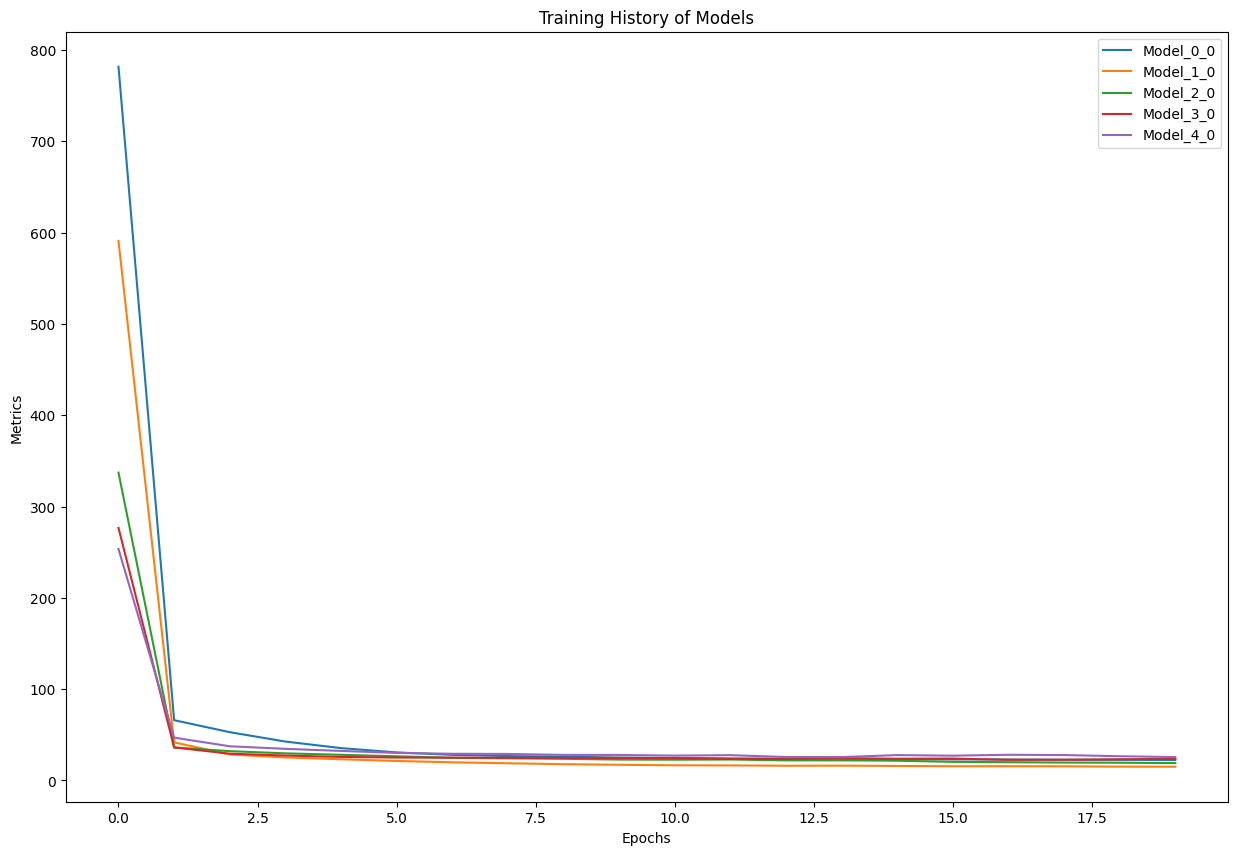

In [61]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(sep_vap_mass_flow_history_0.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(sep_vap_mass_flow_history_1.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(sep_vap_mass_flow_history_2.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(sep_vap_mass_flow_history_3.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(sep_vap_mass_flow_history_4.history['loss']).add_prefix('Model_4_')

# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

## Основная модель для определения массового расхода пара из сепаратора

In [31]:
## Тестовая и обучающая выборки
X = sep_vap_mass_flow_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',  'gas_feed vapour molar flow, kgmole/h',
    'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass frac', 'gas_feed Ethane mass frac',
    'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed Methane mass flow, kg/h', 'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h',
    'gas_feed i-Butane mass flow, kg/h', 'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h',
    'gas_feed n-Pentane mass flow, kg/h', 'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', 
    'gas_feed vapour fraction',
]]

y = sep_vap_mass_flow_data[[
     '1 mass flow, kg/h'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',  'gas_feed vapour molar flow, kgmole/h',
    'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass frac', 'gas_feed Ethane mass frac',
    'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed Methane mass flow, kg/h', 'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h',
    'gas_feed i-Butane mass flow, kg/h', 'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h',
    'gas_feed n-Pentane mass flow, kg/h', 'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', 
    'gas_feed vapour fraction',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((506600, 30), (506600, 1))

In [34]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_mass_flow_model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
sep_vap_mass_flow_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_mass_flow_history = sep_vap_mass_flow_model.fit(X_train_normal, y_train, epochs=50)

Epoch 1/50
15832/15832 [==============================] - 17s 1ms/step - loss: 311.3322 - mae: 311.3322
Epoch 2/50
15832/15832 [==============================] - 17s 1ms/step - loss: 24.9365 - mae: 24.9365
Epoch 3/50
15832/15832 [==============================] - 18s 1ms/step - loss: 20.5406 - mae: 20.5406
Epoch 4/50
15832/15832 [==============================] - 19s 1ms/step - loss: 18.2606 - mae: 18.2606
Epoch 5/50
15832/15832 [==============================] - 17s 1ms/step - loss: 17.0768 - mae: 17.0768
Epoch 6/50
15832/15832 [==============================] - 19s 1ms/step - loss: 16.1212 - mae: 16.1212
Epoch 7/50
15832/15832 [==============================] - 18s 1ms/step - loss: 15.2649 - mae: 15.2649
Epoch 8/50
15832/15832 [==============================] - 18s 1ms/step - loss: 14.7334 - mae: 14.7334
Epoch 9/50
15832/15832 [==============================] - 18s 1ms/step - loss: 14.0383 - mae: 14.0383
Epoch 10/50
15832/15832 [==============================] - 19s 1ms/step - loss: 

In [35]:
sep_vap_mass_flow_model.evaluate(X_test_normal, y_test)

3958/3958 [==============================] - 4s 895us/step - loss: 8.3606 - mae: 8.3606


[8.360551834106445, 8.360551834106445]

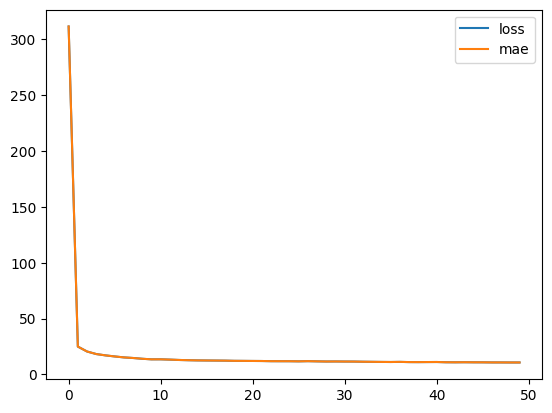

In [36]:
pd.DataFrame(sep_vap_mass_flow_history.history).plot();

In [37]:
y_pred = sep_vap_mass_flow_model.predict(X_test_normal)

3958/3958 [==============================] - 4s 830us/step


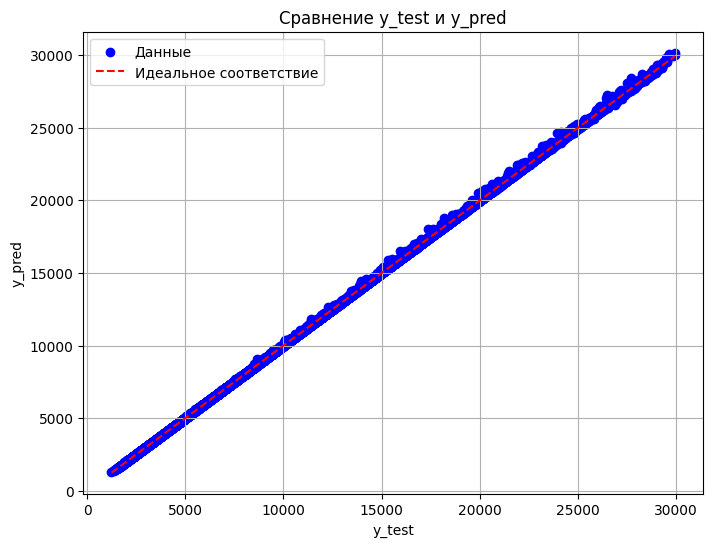

In [38]:
# Диаграмма разброса с линией идеального соответствия

y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, color='blue', label='Данные')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--', label='Идеальное соответствие')
plt.title('Сравнение y_test и y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
sep_vap_mass_flow_model.save('./models/low_temp_dist_19_06/sep_vap_mass_flow_model.h5')

In [40]:
y_pred

array([[ 8554.665],
       [14969.926],
       [ 9482.754],
       ...,
       [12265.5  ],
       [ 9375.567],
       [14826.192]], dtype=float32)

In [44]:
y_test

,"1 mass flow, kg/h"
340638,8552.076281
314613,14971.730370
219439,9469.603517
374434,7163.115685
313146,6342.474990
...,...
239029,4764.131919
417657,22702.653959
162767,12260.316641
343861,9357.991128


In [43]:
test = np.array(X_test['gas_feed mass flow, kg/h']).reshape((126650, 1))
val = test - y_pred

In [42]:
negative_count = np.sum(val < 0)
negative_count

385

## Определение состава паров сепаратора

In [18]:
sep_vap_composition_data = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed actual liquid flow, m3/h', 'gas_feed actual vapour flow, m3/h',
    'gas_feed mass heat capacity', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass flow, kg/h',
    'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h', 'gas_feed i-Butane mass flow, kg/h',
    'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h', 'gas_feed n-Pentane mass flow, kg/h',
    '1 temperature, C', '1 pressure, kPa', '1 mass flow, kg/h',
    '1 Methane mass flow, kg/h', '1 Ethane mass flow, kg/h', '1 Propane mass flow, kg/h',
    '1 i-Butane mass flow, kg/h', '1 n-Butane mass flow, kg/h', '1 i-Pentane mass flow, kg/h',
    '1 n-Pentane mass flow, kg/h',
]]

In [19]:
sep_vap_composition_data.describe()

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3","gas_feed actual liquid flow, m3/h","gas_feed actual vapour flow, m3/h",gas_feed mass heat capacity,gas_feed vapour fraction,"gas_feed molar flow, kgmole/h",...,"1 temperature, C","1 pressure, kPa","1 mass flow, kg/h","1 Methane mass flow, kg/h","1 Ethane mass flow, kg/h","1 Propane mass flow, kg/h","1 i-Butane mass flow, kg/h","1 n-Butane mass flow, kg/h","1 i-Pentane mass flow, kg/h","1 n-Pentane mass flow, kg/h"
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,...,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,17509.966951,24.522286,74.084199,13.320215,236.956733,2.574921,0.763452,719.365460,...,-8.453983,4209.143296,10712.431423,7635.534278,1458.510318,518.405872,590.153528,472.195102,20.834707,16.797618
std,10.275480,404.079523,7214.000778,2.113006,18.272784,7.590347,119.661884,0.082067,0.104859,303.963663,...,10.275480,404.079523,5162.592892,3618.546024,991.702656,426.086991,502.043603,385.744805,30.027946,26.599237
min,-25.000000,3500.000000,5000.000000,17.914715,32.152684,0.000000,19.194900,2.384277,0.312539,164.014283,...,-25.000000,3500.000000,1034.439396,806.043814,28.095102,11.638494,9.212848,1.547543,0.199177,0.131949
25%,-17.000000,3861.000000,11270.000000,23.020770,60.824100,7.239420,141.347757,2.510421,0.692753,459.266317,...,-17.000000,3861.000000,6513.165916,4675.887612,701.612139,222.432593,242.618624,196.118483,5.732289,4.311244
50%,-9.000000,4214.000000,17512.000000,24.479015,71.535329,12.130225,220.863255,2.568602,0.766630,714.255561,...,-9.000000,4214.000000,10149.633666,7279.611415,1232.206002,396.216766,441.620776,364.767431,11.586948,8.839895
75%,0.000000,4560.000000,23749.750000,25.973181,84.574906,18.370036,313.808720,2.629941,0.838392,969.084648,...,0.000000,4560.000000,14213.364740,10139.320722,1990.965690,680.084162,774.294816,634.261008,23.706356,18.485985
max,10.000000,4900.000000,30000.000000,31.365853,202.689706,46.951055,904.602025,3.049459,1.000000,1617.505790,...,10.000000,4900.000000,29995.000000,24069.689237,8742.041315,4859.550840,5767.519308,3857.770293,683.083815,678.297606


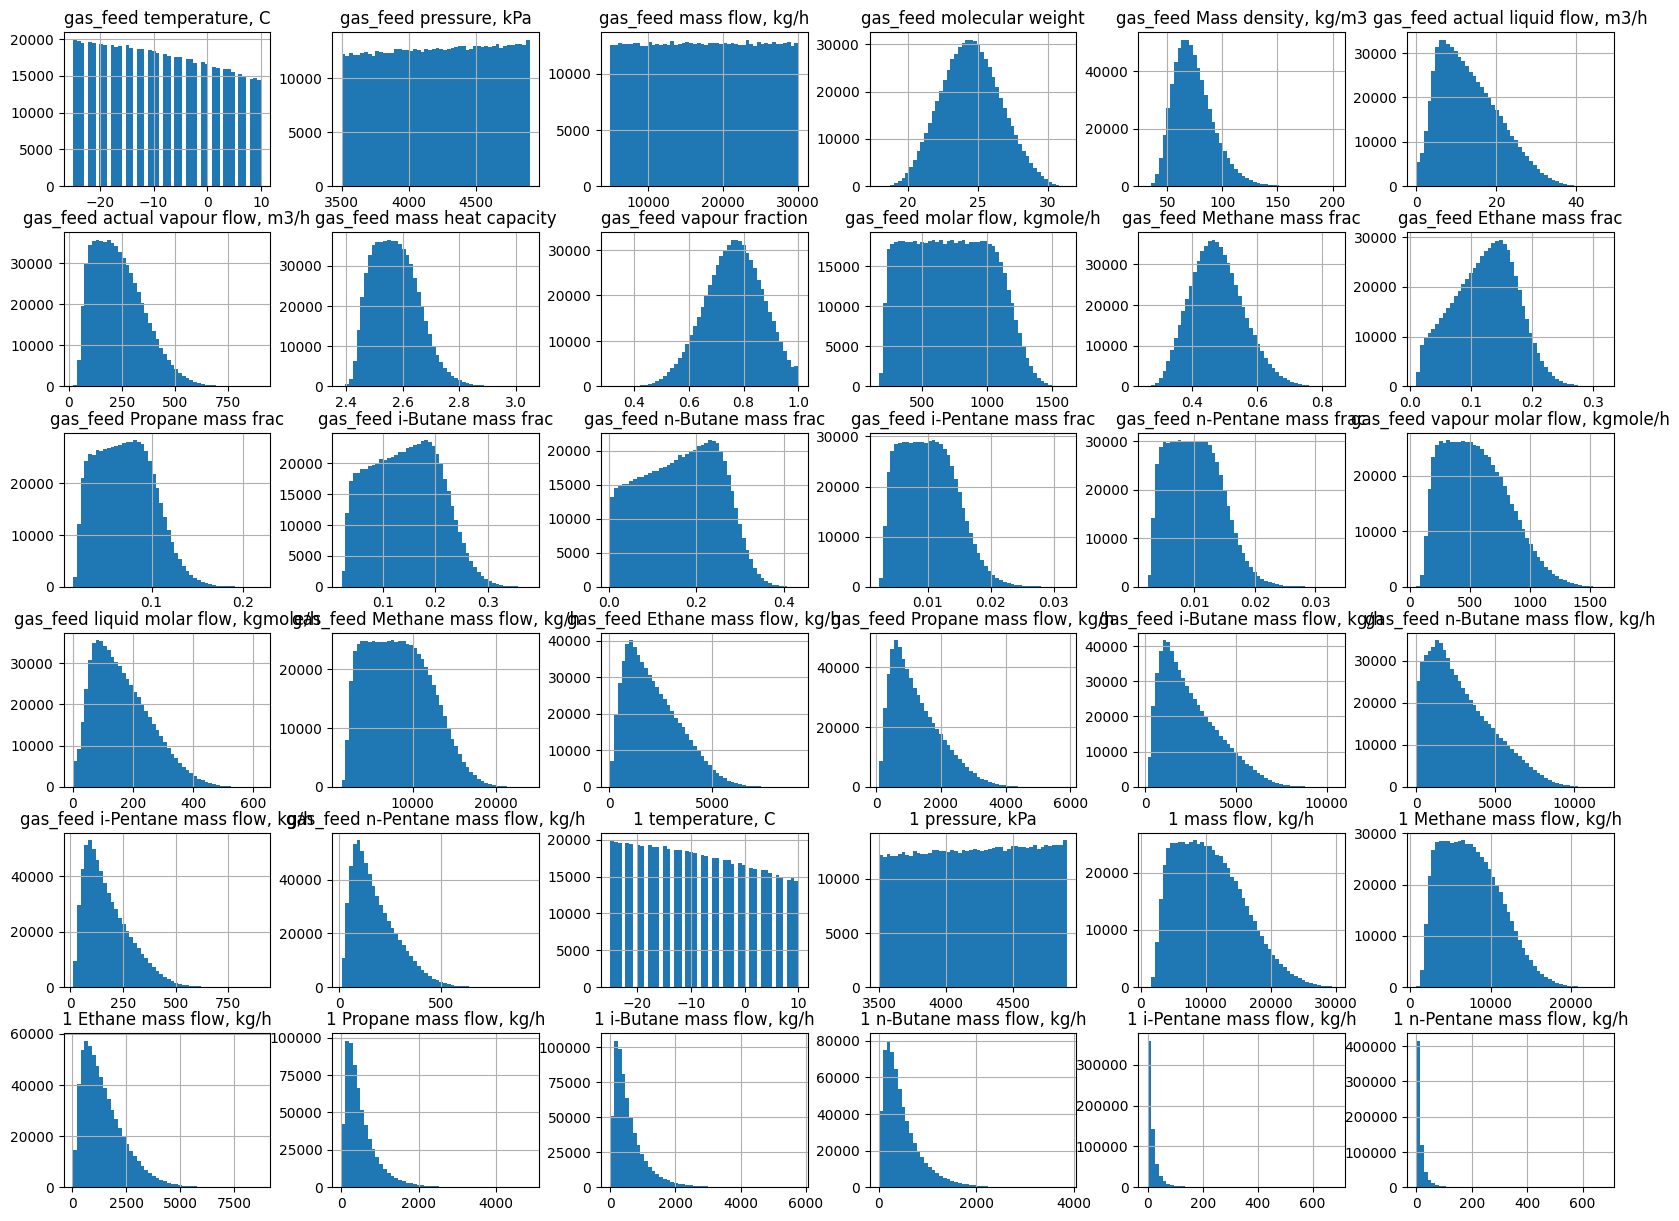

In [6]:
sep_vap_composition_data.hist(bins=50, figsize=(20, 15));

In [7]:
sep_vap_composition_data_mini = sep_vap_composition_data.sample(frac=0.5)

In [8]:
## Тестовая и обучающая выборки
X = sep_vap_composition_data_mini[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed actual liquid flow, m3/h', 'gas_feed actual vapour flow, m3/h',
    'gas_feed mass heat capacity', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass flow, kg/h',
    'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h', 'gas_feed i-Butane mass flow, kg/h',
    'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h', 'gas_feed n-Pentane mass flow, kg/h',
    '1 temperature, C', '1 pressure, kPa', '1 mass flow, kg/h',
]]

y = sep_vap_composition_data_mini[[
    '1 Methane mass flow, kg/h', '1 Ethane mass flow, kg/h', '1 Propane mass flow, kg/h',
    '1 i-Butane mass flow, kg/h', '1 n-Butane mass flow, kg/h', '1 i-Pentane mass flow, kg/h',
    '1 n-Pentane mass flow, kg/h',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed actual liquid flow, m3/h', 'gas_feed actual vapour flow, m3/h',
    'gas_feed mass heat capacity', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass flow, kg/h',
    'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h', 'gas_feed i-Butane mass flow, kg/h',
    'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h', 'gas_feed n-Pentane mass flow, kg/h',
    '1 temperature, C', '1 pressure, kPa', '1 mass flow, kg/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((253300, 29), (253300, 7))

In [9]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_comp_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(29, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
sep_vap_comp_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_comp_model_0_history = sep_vap_comp_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 225.4114 - mae: 225.4114
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 117.3679 - mae: 117.3679
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 94.5008 - mae: 94.5008
Epoch 4/20
7916/7916 [==============================] - 10s 1ms/step - loss: 72.7257 - mae: 72.7257
Epoch 5/20
7916/7916 [==============================] - 9s 1ms/step - loss: 53.2904 - mae: 53.2904
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 36.6272 - mae: 36.6272
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 24.3632 - mae: 24.3632
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 20.4621 - mae: 20.4621
Epoch 9/20
7916/7916 [==============================] - 9s 1ms/step - loss: 18.6177 - mae: 18.6177
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 17.5366 - mae: 17.5366
Epo

In [10]:
sep_vap_comp_model_0.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 889us/step - loss: 12.8278 - mae: 12.8278


[12.827752113342285, 12.827752113342285]

In [11]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_comp_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(29, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
sep_vap_comp_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_comp_model_1_history = sep_vap_comp_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 10s 1ms/step - loss: 219.7848 - mae: 219.7848
Epoch 2/20
7916/7916 [==============================] - 10s 1ms/step - loss: 193.2587 - mae: 193.2587
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 192.7430 - mae: 192.7430
Epoch 4/20
7916/7916 [==============================] - 10s 1ms/step - loss: 174.4518 - mae: 174.4518
Epoch 5/20
7916/7916 [==============================] - 11s 1ms/step - loss: 115.3149 - mae: 115.3149
Epoch 6/20
7916/7916 [==============================] - 13s 2ms/step - loss: 113.0229 - mae: 113.0229
Epoch 7/20
7916/7916 [==============================] - 12s 2ms/step - loss: 108.7760 - mae: 108.7760
Epoch 8/20
7916/7916 [==============================] - 10s 1ms/step - loss: 86.3273 - mae: 86.3273
Epoch 9/20
7916/7916 [==============================] - 11s 1ms/step - loss: 78.7933 - mae: 78.7933
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 77.4227 -

In [12]:
sep_vap_comp_model_1.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 1ms/step - loss: 15.4676 - mae: 15.4676


[15.467557907104492, 15.467557907104492]

In [13]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_comp_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(29, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
sep_vap_comp_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_comp_model_2_history = sep_vap_comp_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 12s 1ms/step - loss: 190.3799 - mae: 190.3799
Epoch 2/20
7916/7916 [==============================] - 11s 1ms/step - loss: 103.5832 - mae: 103.5832
Epoch 3/20
7916/7916 [==============================] - 11s 1ms/step - loss: 72.7259 - mae: 72.7259
Epoch 4/20
7916/7916 [==============================] - 11s 1ms/step - loss: 47.6168 - mae: 47.6168
Epoch 5/20
7916/7916 [==============================] - 11s 1ms/step - loss: 30.4179 - mae: 30.4179
Epoch 6/20
7916/7916 [==============================] - 12s 2ms/step - loss: 18.0485 - mae: 18.0485
Epoch 7/20
7916/7916 [==============================] - 11s 1ms/step - loss: 15.8590 - mae: 15.8590
Epoch 8/20
7916/7916 [==============================] - 11s 1ms/step - loss: 14.9922 - mae: 14.9922
Epoch 9/20
7916/7916 [==============================] - 13s 2ms/step - loss: 14.2861 - mae: 14.2861
Epoch 10/20
7916/7916 [==============================] - 13s 2ms/step - loss: 13.6567 - mae: 13.

In [14]:
sep_vap_comp_model_2.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 950us/step - loss: 9.0201 - mae: 9.0201


[9.020110130310059, 9.020110130310059]

In [15]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_comp_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(29, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
sep_vap_comp_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_comp_model_3_history = sep_vap_comp_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 12s 1ms/step - loss: 179.1121 - mae: 179.1121
Epoch 2/20
7916/7916 [==============================] - 10s 1ms/step - loss: 104.9907 - mae: 104.9907
Epoch 3/20
7916/7916 [==============================] - 12s 1ms/step - loss: 82.6429 - mae: 82.6429
Epoch 4/20
7916/7916 [==============================] - 12s 1ms/step - loss: 70.9214 - mae: 70.9214
Epoch 5/20
7916/7916 [==============================] - 11s 1ms/step - loss: 41.1704 - mae: 41.1704
Epoch 6/20
7916/7916 [==============================] - 13s 2ms/step - loss: 20.1500 - mae: 20.1500
Epoch 7/20
7916/7916 [==============================] - 12s 2ms/step - loss: 17.6801 - mae: 17.6801
Epoch 8/20
7916/7916 [==============================] - 12s 2ms/step - loss: 16.5069 - mae: 16.5069
Epoch 9/20
7916/7916 [==============================] - 13s 2ms/step - loss: 15.7102 - mae: 15.7102
Epoch 10/20
7916/7916 [==============================] - 12s 2ms/step - loss: 14.7475 - mae: 14.

In [16]:
sep_vap_comp_model_3.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 907us/step - loss: 10.1040 - mae: 10.1040


[10.10402774810791, 10.10402774810791]

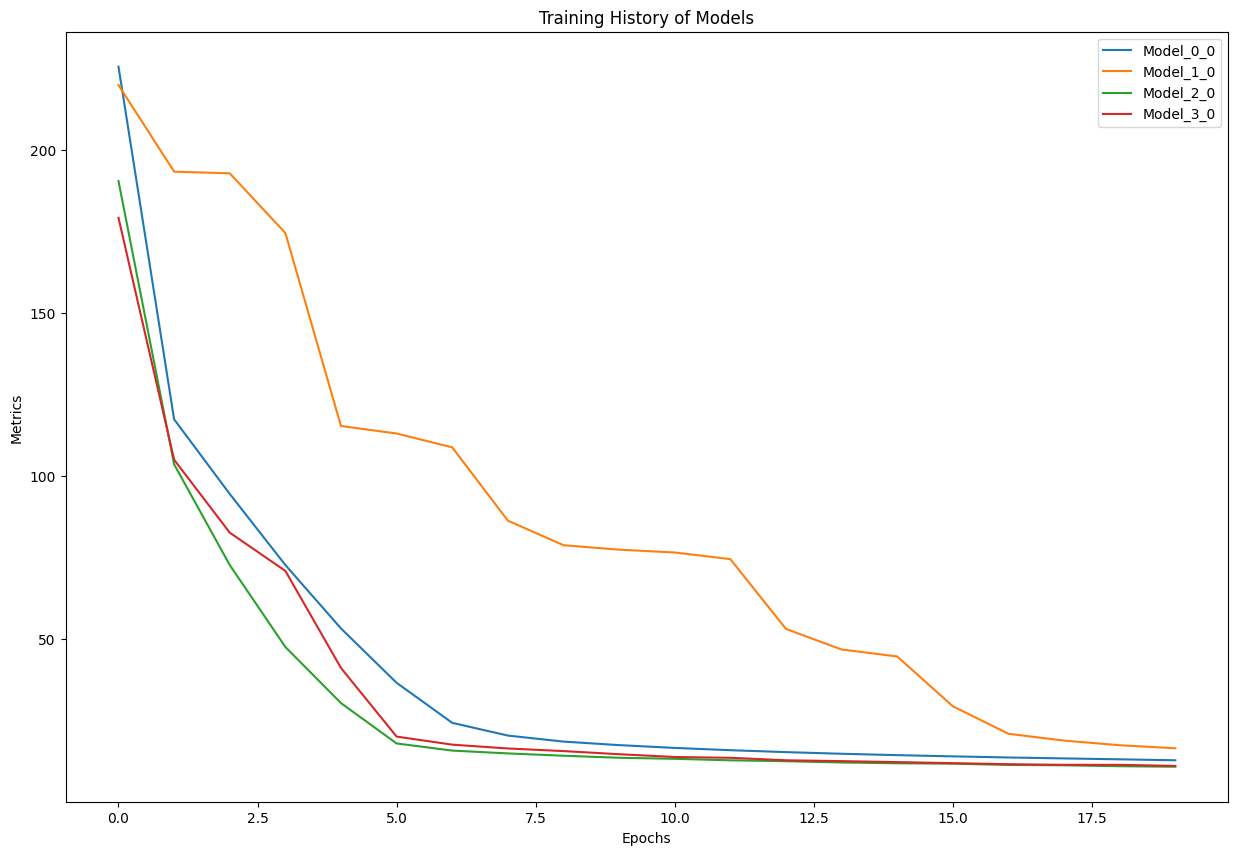

In [17]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(sep_vap_comp_model_0_history.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(sep_vap_comp_model_1_history.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(sep_vap_comp_model_2_history.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(sep_vap_comp_model_3_history.history['loss']).add_prefix('Model_3_')


# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

# Основная модель для определения состава пара сепаратора

In [20]:
## Тестовая и обучающая выборки
X = sep_vap_composition_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed actual liquid flow, m3/h', 'gas_feed actual vapour flow, m3/h',
    'gas_feed mass heat capacity', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass flow, kg/h',
    'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h', 'gas_feed i-Butane mass flow, kg/h',
    'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h', 'gas_feed n-Pentane mass flow, kg/h',
    '1 temperature, C', '1 pressure, kPa', '1 mass flow, kg/h',
]]

y = sep_vap_composition_data[[
    '1 Methane mass flow, kg/h', '1 Ethane mass flow, kg/h', '1 Propane mass flow, kg/h',
    '1 i-Butane mass flow, kg/h', '1 n-Butane mass flow, kg/h', '1 i-Pentane mass flow, kg/h',
    '1 n-Pentane mass flow, kg/h',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed actual liquid flow, m3/h', 'gas_feed actual vapour flow, m3/h',
    'gas_feed mass heat capacity', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass flow, kg/h',
    'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h', 'gas_feed i-Butane mass flow, kg/h',
    'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h', 'gas_feed n-Pentane mass flow, kg/h',
    '1 temperature, C', '1 pressure, kPa', '1 mass flow, kg/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((506600, 29), (506600, 7))

In [21]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_comp_model = tf.keras.Sequential([
    tf.keras.layers.Dense(29, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
sep_vap_comp_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_comp_model_history = sep_vap_comp_model.fit(X_train_normal, y_train, epochs=30)

Epoch 1/30
15832/15832 [==============================] - 19s 1ms/step - loss: 197.6340 - mae: 197.6340
Epoch 2/30
15832/15832 [==============================] - 21s 1ms/step - loss: 115.1516 - mae: 115.1516
Epoch 3/30
15832/15832 [==============================] - 20s 1ms/step - loss: 112.5752 - mae: 112.5752
Epoch 4/30
15832/15832 [==============================] - 23s 1ms/step - loss: 82.7988 - mae: 82.7988
Epoch 5/30
15832/15832 [==============================] - 22s 1ms/step - loss: 76.2504 - mae: 76.2504
Epoch 6/30
15832/15832 [==============================] - 21s 1ms/step - loss: 71.2957 - mae: 71.2957
Epoch 7/30
15832/15832 [==============================] - 22s 1ms/step - loss: 33.1227 - mae: 33.1227
Epoch 8/30
15832/15832 [==============================] - 22s 1ms/step - loss: 18.0579 - mae: 18.0579
Epoch 9/30
15832/15832 [==============================] - 22s 1ms/step - loss: 15.6085 - mae: 15.6085
Epoch 10/30
15832/15832 [==============================] - 21s 1ms/step - lo

In [22]:
sep_vap_comp_model.evaluate(X_test_normal, y_test)

3958/3958 [==============================] - 3s 804us/step - loss: 10.1136 - mae: 10.1136


[10.113582611083984, 10.113582611083984]

In [26]:
y_pred = sep_vap_comp_model.predict(X_test_normal)

3958/3958 [==============================] - 3s 735us/step


In [73]:
x = 6321
y_pred[x]

array([8419.682  , 1406.6664 , 1414.3875 ,  983.18945,  625.3182 ,
         64.58029,   34.06536], dtype=float32)

In [74]:
mass_frac = (y_pred[x] / sum(y_pred[x])) * 100
mass_frac

array([65.02744   , 10.864059  , 10.923692  ,  7.5934343 ,  4.8294992 ,
        0.49877083,  0.2630959 ], dtype=float32)

In [75]:
y_test.iloc[x]

1 Methane mass flow, kg/h      8363.735689
1 Ethane mass flow, kg/h       1423.491353
1 Propane mass flow, kg/h      1427.165492
1 i-Butane mass flow, kg/h      964.897784
1 n-Butane mass flow, kg/h      619.504035
1 i-Pentane mass flow, kg/h      61.722869
1 n-Pentane mass flow, kg/h      32.288602
Name: 463125, dtype: float64

In [76]:
slice1 = y_test.iloc[x].values
mass_frac_test = (slice1 / sum(slice1)) * 100
mass_frac_test

array([64.87133835, 11.04097411, 11.0694717 ,  7.48400152,  4.80503657,
        0.47873884,  0.25043891])

In [33]:
def plot_scatter_with_ideal_line(y_pred, y_test):
    """
    Визуализирует диаграмму разброса с линией идеального соответствия для y_pred и y_test.
    
    Args:
    y_pred (array-like): Предсказанные значения модели.
    y_test (array-like): Истинные значения.

    """
    # Преобразуем y_test в массив numpy, если это pandas Series
    if isinstance(y_test, pd.Series):
        y_test = y_test.values
    
    # Создаем диаграмму разброса
    plt.scatter(y_test, y_pred, color='blue', label='Предсказания')
    
    # Добавляем линию идеального соответствия
    max_value = np.max([np.max(y_test), np.max(y_pred)])
    min_value = np.min([np.min(y_test), np.min(y_pred)])
    plt.plot([min_value, max_value], [min_value, max_value], color='red', label='Идеальное соответствие')
    
    # Добавляем подписи и заголовок
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.title('Диаграмма разброса: Истинные значения vs. Предсказанные значения')
    plt.legend()
    
    # Показываем график
    plt.show()

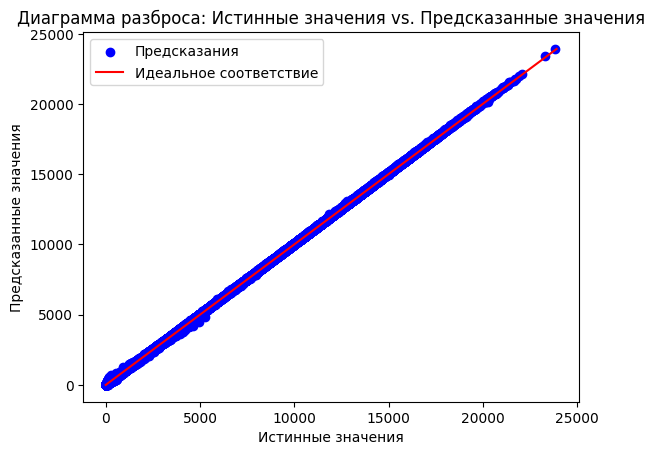

In [34]:
plot_scatter_with_ideal_line(y_pred, np.array(y_test))

In [77]:
sep_vap_comp_model.save('./models/low_temp_dist_19_06/sep_vap_comp_model.h5')

# Определяем состав потока 2

In [118]:
stream_1_comp_mass_flow = sep_vap_comp_model.predict(X_test_normal)

3958/3958 [==============================] - 3s 783us/step


In [132]:
x = 76

In [133]:
stream_1_comp_mass_flow[x]

array([13473.034  ,   730.9953 ,  1182.5673 ,  1270.1038 ,  1458.5431 ,
         204.9519 ,    86.04673], dtype=float32)

In [134]:
gas_feed_comp_mass_flow = np.array(
    X_test[[
        'gas_feed Methane mass flow, kg/h', 'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h',
        'gas_feed i-Butane mass flow, kg/h', 'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h',
        'gas_feed n-Pentane mass flow, kg/h',
    ]]
)[x]

gas_feed_comp_mass_flow

array([13569.64183278,   757.9055864 ,  1364.73902522,  1704.71856806,
        2052.54998919,   399.39865183,   171.04634653])

In [135]:
stream_2_comp_mass_flow = gas_feed_comp_mass_flow - stream_1_comp_mass_flow[x]
stream_2_comp_mass_flow[stream_2_comp_mass_flow < 0] = 0
stream_2_comp_mass_flow

array([ 96.60765309,  26.91028611, 182.17176447, 434.6148083 ,
       594.00689837, 194.44674753,  84.99961649])

In [131]:
count = np.sum(stream_2_comp_mass_flow < 0)
count

0

# Определение температуры потока 3

In [144]:
expander_gas_temp_data = data[[
    '1 temperature, C', '1 pressure, kPa', '1 mass flow, kg/h', '1 molecular weight', '1 mass heat capacity',
    '1 Methane mass frac', '1 Ethane mass frac', '1 Propane mass frac', '1 i-Butane mass frac', '1 n-Butane mass frac',
    '1 i-Pentane mass frac', '1 n-Pentane mass frac',
    '3 temperature, C', '3 pressure, kPa',
]]

In [145]:
expander_gas_temp_data.describe()

,"1 temperature, C","1 pressure, kPa","1 mass flow, kg/h",1 molecular weight,1 mass heat capacity,1 Methane mass frac,1 Ethane mass frac,1 Propane mass frac,1 i-Butane mass frac,1 n-Butane mass frac,1 i-Pentane mass frac,1 n-Pentane mass frac,"3 temperature, C","3 pressure, kPa"
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,10712.431423,19.259311,2.609909,0.718471,0.134788,0.046228,0.053044,0.044420,0.001696,0.001352,-31.089714,2299.584700
std,10.275480,404.079523,5162.592892,0.896723,0.111058,0.067168,0.054228,0.022847,0.029172,0.025719,0.001628,0.001440,11.962369,173.374179
min,-25.000000,3500.000000,1034.439396,17.130669,2.386038,0.479266,0.012404,0.006167,0.004012,0.000424,0.000114,0.000081,-62.085922,2000.000000
25%,-17.000000,3861.000000,6513.165916,18.560408,2.525792,0.669906,0.095043,0.028700,0.031390,0.025647,0.000742,0.000558,-40.551916,2149.000000
50%,-9.000000,4214.000000,10149.633666,19.168364,2.599500,0.720322,0.139028,0.042891,0.047729,0.040633,0.001224,0.000935,-31.359726,2300.000000
75%,0.000000,4560.000000,14213.364740,19.905431,2.682116,0.767390,0.175177,0.059887,0.069288,0.060087,0.002058,0.001611,-21.602613,2450.000000
max,10.000000,4900.000000,29995.000000,22.781666,3.085834,0.903850,0.319423,0.197802,0.220296,0.166266,0.029418,0.026734,-0.384276,2600.000000


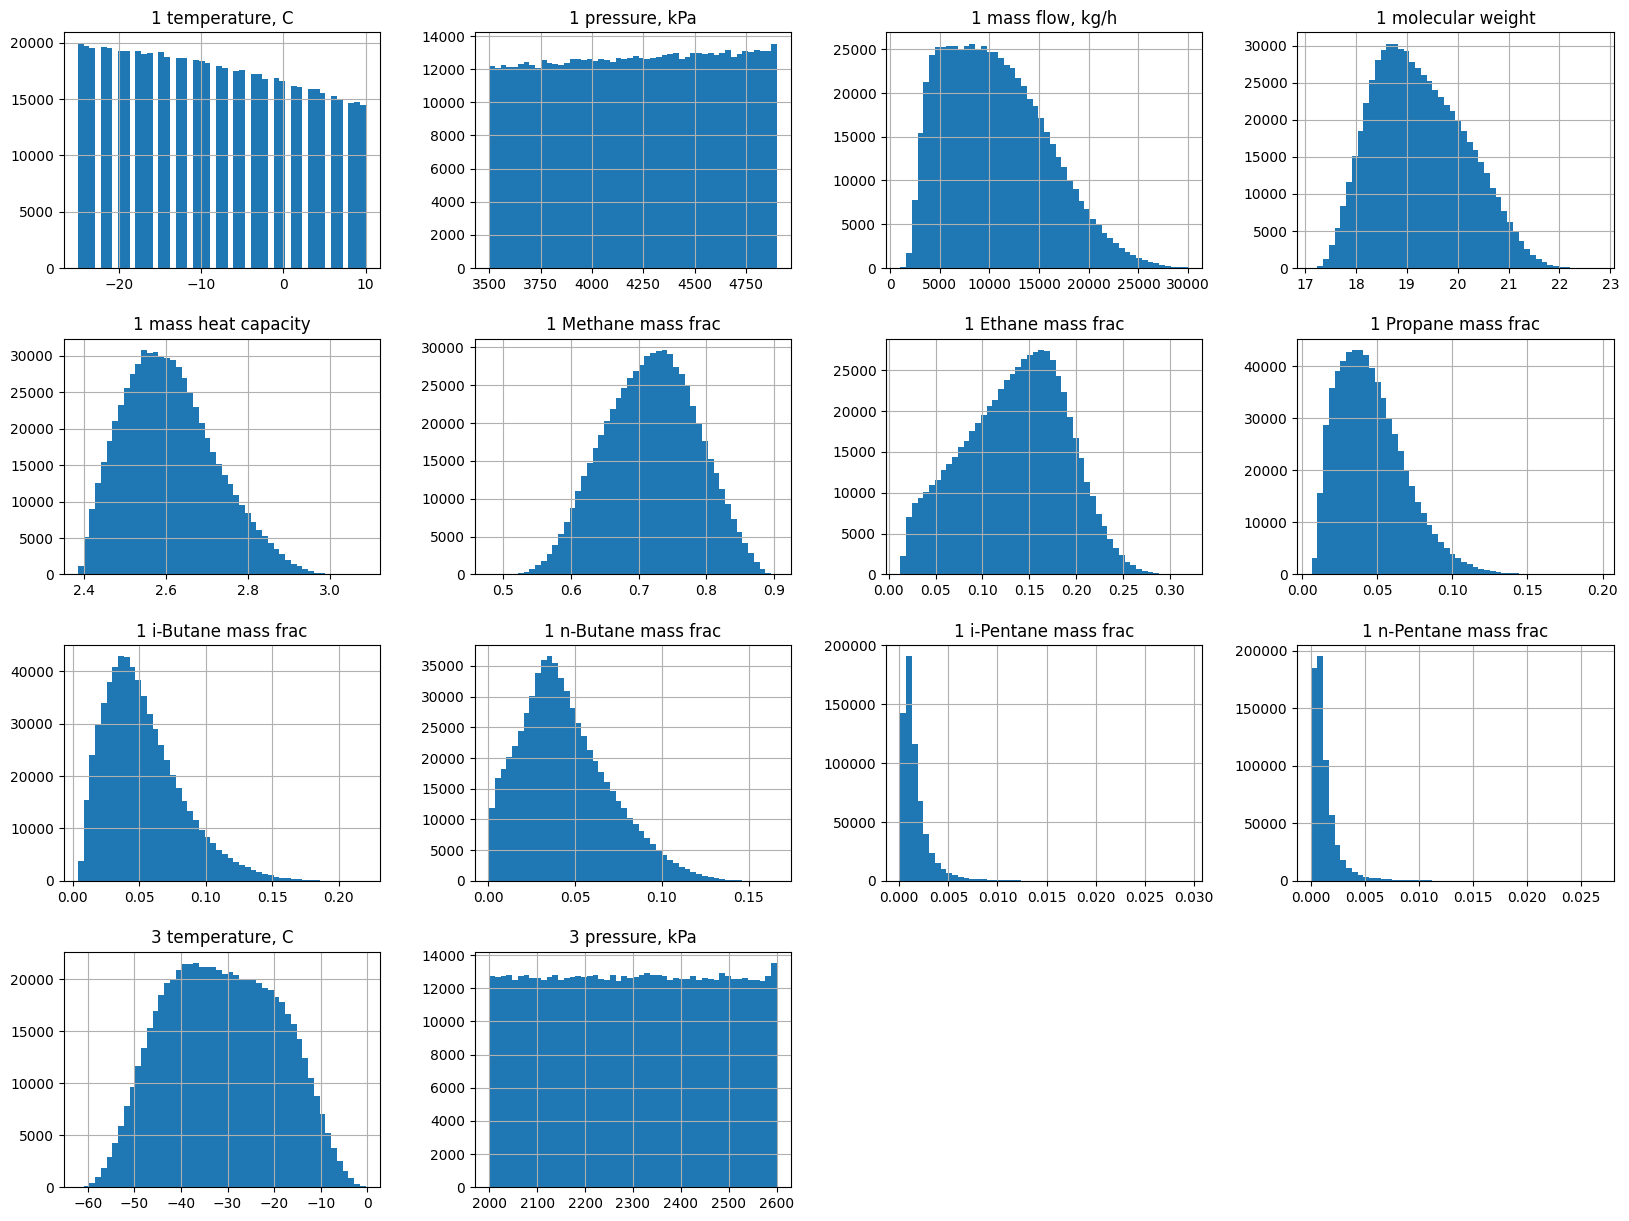

In [146]:
expander_gas_temp_data.hist(bins=50, figsize=(20, 15));

In [147]:
corr_matrix = expander_gas_temp_data.corr()

corr_matrix['3 temperature, C'].sort_values(ascending=False)

3 temperature, C         1.000000
1 temperature, C         0.919480
1 molecular weight       0.824865
1 n-Butane mass frac     0.543149
1 i-Butane mass frac     0.525633
1 i-Pentane mass frac    0.428002
1 n-Pentane mass frac    0.418305
1 Propane mass frac      0.370407
3 pressure, kPa          0.221330
1 mass flow, kg/h        0.186431
1 Ethane mass frac       0.163082
1 pressure, kPa         -0.311740
1 Methane mass frac     -0.713260
1 mass heat capacity    -0.775778
Name: 3 temperature, C, dtype: float64

In [149]:
expander_gas_temp_data_mini = expander_gas_temp_data.sample(frac=0.5)
expander_gas_temp_data_mini.head(10)

,"1 temperature, C","1 pressure, kPa","1 mass flow, kg/h",1 molecular weight,1 mass heat capacity,1 Methane mass frac,1 Ethane mass frac,1 Propane mass frac,1 i-Butane mass frac,1 n-Butane mass frac,1 i-Pentane mass frac,1 n-Pentane mass frac,"3 temperature, C","3 pressure, kPa"
216299,-22.0,4470.0,9579.124179,18.344040,2.770255,0.773851,0.142533,0.019140,0.039160,0.023490,0.001202,0.000625,-46.919522,2406.0
249847,5.0,4712.0,7569.383792,20.620838,2.647442,0.613979,0.202614,0.061458,0.039953,0.080102,0.001417,0.000476,-21.527327,2267.0
492799,7.0,3859.0,13494.927617,20.811704,2.463672,0.612758,0.164420,0.105605,0.023709,0.086189,0.002031,0.005289,-15.756844,2036.0
558786,-8.0,4840.0,12791.394168,18.734017,2.716525,0.761036,0.104711,0.028505,0.043221,0.060504,0.001639,0.000384,-33.739470,2485.0
366399,-1.0,3930.0,13067.866811,19.135585,2.498051,0.755853,0.023822,0.111890,0.079927,0.013273,0.003922,0.011315,-25.230553,2046.0
295176,9.0,4648.0,11721.676593,21.283258,2.619204,0.580240,0.204425,0.059723,0.114091,0.037734,0.002909,0.000878,-15.505792,2330.0
161591,-18.0,4134.0,18944.598501,19.263529,2.674108,0.690013,0.203320,0.057310,0.029621,0.016954,0.001809,0.000973,-38.419080,2431.0
540984,-12.0,3826.0,4126.725702,18.546045,2.531355,0.783781,0.063139,0.062639,0.049225,0.037718,0.002273,0.001224,-29.744743,2388.0
248026,-19.0,3556.0,4999.846478,18.102729,2.517433,0.817531,0.050708,0.060988,0.035270,0.033774,0.000494,0.001235,-31.148057,2597.0
537685,-21.0,3995.0,8391.244816,18.471288,2.631646,0.775157,0.104826,0.049772,0.062607,0.006736,0.000581,0.000320,-43.332776,2200.0


In [150]:
## Тестовая и обучающая выборки
X = expander_gas_temp_data_mini[[
    '1 temperature, C', '1 pressure, kPa', '1 mass flow, kg/h', '1 molecular weight', '1 mass heat capacity',
    '1 Methane mass frac', '1 Ethane mass frac', '1 Propane mass frac', '1 i-Butane mass frac', '1 n-Butane mass frac',
    '1 i-Pentane mass frac', '1 n-Pentane mass frac',
    '3 pressure, kPa',
]]

y = expander_gas_temp_data_mini[[
    '3 temperature, C'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    '1 temperature, C', '1 pressure, kPa', '1 mass flow, kg/h', '1 molecular weight', '1 mass heat capacity',
    '1 Methane mass frac', '1 Ethane mass frac', '1 Propane mass frac', '1 i-Butane mass frac', '1 n-Butane mass frac',
    '1 i-Pentane mass frac', '1 n-Pentane mass frac',
    '3 pressure, kPa',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((253300, 13), (253300, 1))

In [151]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_0_history = expander_gas_temp_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 8s 945us/step - loss: 0.8433 - mae: 0.8433
Epoch 2/20
7916/7916 [==============================] - 8s 971us/step - loss: 0.1146 - mae: 0.1146
Epoch 3/20
7916/7916 [==============================] - 8s 970us/step - loss: 0.0989 - mae: 0.0989
Epoch 4/20
7916/7916 [==============================] - 8s 1ms/step - loss: 0.0834 - mae: 0.0834
Epoch 5/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0708 - mae: 0.0708
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0665 - mae: 0.0665
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0634 - mae: 0.0634
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0628 - mae: 0.0628
Epoch 9/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0622 - mae: 0.0622
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0608 - mae: 0.0608
Epoch 11/20
7916/7916

In [152]:
expander_gas_temp_model_0.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 839us/step - loss: 0.0643 - mae: 0.0643


[0.06427371501922607, 0.06427371501922607]

In [153]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_1_history = expander_gas_temp_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.6755 - mae: 0.6755
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1033 - mae: 0.1033
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0940 - mae: 0.0940
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0901 - mae: 0.0901
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0881 - mae: 0.0881
Epoch 6/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0827 - mae: 0.0827
Epoch 7/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0790 - mae: 0.0790
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0751 - mae: 0.0751
Epoch 9/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0730 - mae: 0.0730
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0703 - mae: 0.0703
Epoch 11/20
7916/7916 [=

In [154]:
expander_gas_temp_model_1.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 745us/step - loss: 0.0570 - mae: 0.0570


[0.05701196938753128, 0.05701196938753128]

In [155]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_2_history = expander_gas_temp_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.4930 - mae: 0.4930
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0885 - mae: 0.0885
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0806 - mae: 0.0806
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0803 - mae: 0.0803
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0745 - mae: 0.0745
Epoch 6/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0740 - mae: 0.0740
Epoch 7/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0728 - mae: 0.0728
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0739 - mae: 0.0739
Epoch 9/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0705 - mae: 0.0705
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0677 - mae: 0.0677
Epoch 11/20
7916/7916 [=

In [156]:
expander_gas_temp_model_2.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 814us/step - loss: 0.0317 - mae: 0.0317


[0.03165135532617569, 0.03165135532617569]

In [157]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_3_history = expander_gas_temp_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.4824 - mae: 0.4824
Epoch 2/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1263 - mae: 0.1263
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1242 - mae: 0.1242
Epoch 4/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.1205 - mae: 0.1205
Epoch 5/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.1168 - mae: 0.1168
Epoch 6/20
7916/7916 [==============================] - 13s 2ms/step - loss: 0.1092 - mae: 0.1092
Epoch 7/20
7916/7916 [==============================] - 12s 2ms/step - loss: 0.1095 - mae: 0.1095
Epoch 8/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.1040 - mae: 0.1040
Epoch 9/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.1076 - mae: 0.1076
Epoch 10/20
7916/7916 [==============================] - 13s 2ms/step - loss: 0.1042 - mae: 0.1042
Epoch 11/20
7916/791

In [158]:
expander_gas_temp_model_3.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 816us/step - loss: 0.0592 - mae: 0.0592


[0.059202518314123154, 0.059202518314123154]

In [159]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_4_history = expander_gas_temp_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.4883 - mae: 0.4883
Epoch 2/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1930 - mae: 0.1930
Epoch 3/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1729 - mae: 0.1729
Epoch 4/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.1634 - mae: 0.1634
Epoch 5/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.1548 - mae: 0.1548
Epoch 6/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.1427 - mae: 0.1427
Epoch 7/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.1392 - mae: 0.1392
Epoch 8/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.1334 - mae: 0.1334
Epoch 9/20
7916/7916 [==============================] - 12s 2ms/step - loss: 0.1352 - mae: 0.1352
Epoch 10/20
7916/7916 [==============================] - 12s 2ms/step - loss: 0.1277 - mae: 0.1277
Epoch 11/20
7916/79

In [160]:
expander_gas_temp_model_4.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 936us/step - loss: 0.0656 - mae: 0.0656


[0.06561696529388428, 0.06561696529388428]

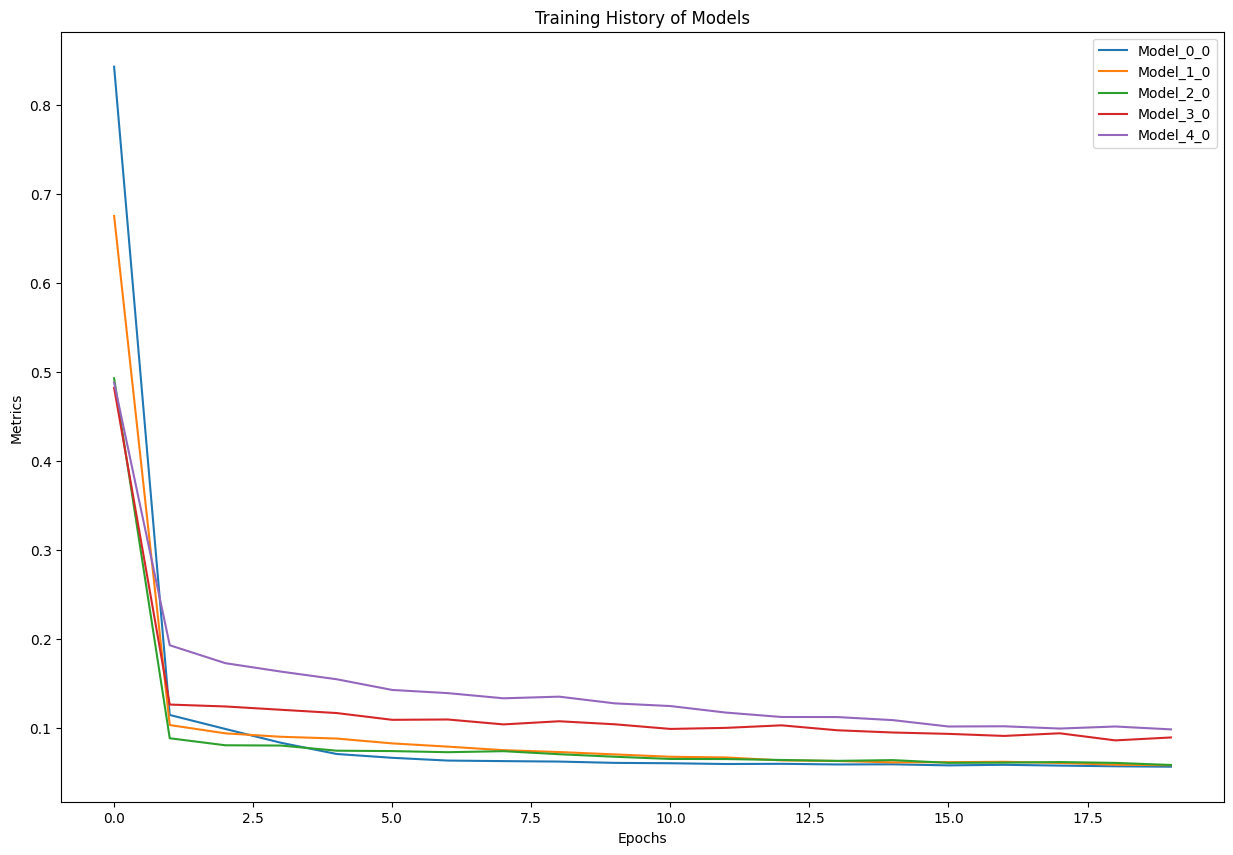

In [161]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(expander_gas_temp_0_history.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(expander_gas_temp_1_history.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(expander_gas_temp_2_history.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(expander_gas_temp_3_history.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(expander_gas_temp_4_history.history['loss']).add_prefix('Model_4_')


# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

## Основная модель для определения температуры газа после детандера

In [162]:
## Тестовая и обучающая выборки
X = expander_gas_temp_data[[
    '1 temperature, C', '1 pressure, kPa', '1 mass flow, kg/h', '1 molecular weight', '1 mass heat capacity',
    '1 Methane mass frac', '1 Ethane mass frac', '1 Propane mass frac', '1 i-Butane mass frac', '1 n-Butane mass frac',
    '1 i-Pentane mass frac', '1 n-Pentane mass frac',
    '3 pressure, kPa',
]]

y = expander_gas_temp_data[[
    '3 temperature, C'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    '1 temperature, C', '1 pressure, kPa', '1 mass flow, kg/h', '1 molecular weight', '1 mass heat capacity',
    '1 Methane mass frac', '1 Ethane mass frac', '1 Propane mass frac', '1 i-Butane mass frac', '1 n-Butane mass frac',
    '1 i-Pentane mass frac', '1 n-Pentane mass frac',
    '3 pressure, kPa',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((506600, 13), (506600, 1))

In [164]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model = tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_history = expander_gas_temp_model.fit(X_train_normal, y_train, epochs=30)

Epoch 1/30
15832/15832 [==============================] - 18s 1ms/step - loss: 0.6258 - mae: 0.6258
Epoch 2/30
15832/15832 [==============================] - 17s 1ms/step - loss: 0.1753 - mae: 0.1753
Epoch 3/30
15832/15832 [==============================] - 18s 1ms/step - loss: 0.1125 - mae: 0.1125
Epoch 4/30
15832/15832 [==============================] - 18s 1ms/step - loss: 0.1041 - mae: 0.1041
Epoch 5/30
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0999 - mae: 0.0999
Epoch 6/30
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0988 - mae: 0.0988
Epoch 7/30
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0970 - mae: 0.0970
Epoch 8/30
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0950 - mae: 0.0950
Epoch 9/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.0928 - mae: 0.0928
Epoch 10/30
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0839 - mae: 0.0839

In [165]:
expander_gas_temp_model.evaluate(X_test_normal, y_test)

3958/3958 [==============================] - 4s 899us/step - loss: 0.0762 - mae: 0.0762


[0.0761750116944313, 0.0761750116944313]

In [166]:
y_pred = expander_gas_temp_model.predict(X_test_normal)

3958/3958 [==============================] - 4s 869us/step


In [167]:
y_pred

array([[-27.019077],
       [-43.55922 ],
       [-18.773582],
       ...,
       [-24.188105],
       [-23.966993],
       [-40.232883]], dtype=float32)

In [168]:
y_test

,"3 temperature, C"
340638,-27.072841
314613,-43.578510
219439,-18.806303
374434,-24.309590
313146,-31.993621
...,...
239029,-28.518996
417657,-15.436765
162767,-24.242871
343861,-24.021217


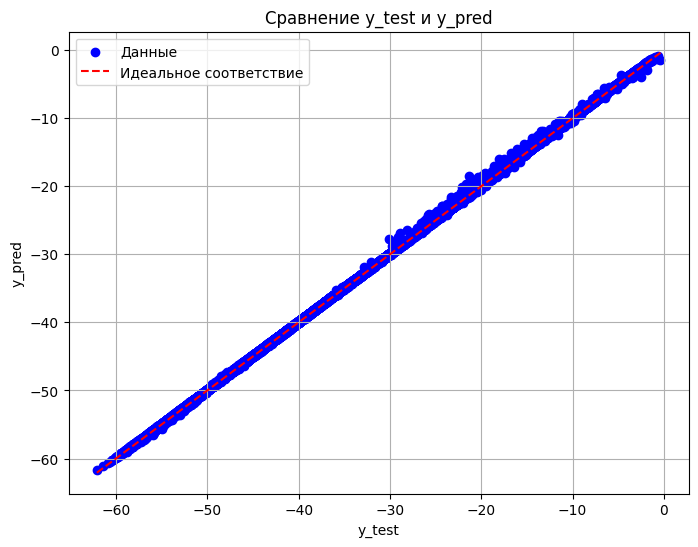

In [169]:
# Диаграмма разброса с линией идеального соответствия

y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, color='blue', label='Данные')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--', label='Идеальное соответствие')
plt.title('Сравнение y_test и y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.grid(True)
plt.show()

In [170]:
expander_gas_temp_model.save('./models/low_temp_dist_19_06/expander_gas_temp_model.h5')